In [604]:
import face_recognition
from face_recognition.face_recognition_cli import image_files_in_folder
import numpy as np
import os
import os.path
import pickle
from PIL import Image, ImageDraw
import glob 
import cv2
import imutils
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

cwd = os.getcwd()
inputDir = cwd + "/input"

image = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

[(201, 409, 468, 141)]


In [317]:
data_dir = "./input/known/known"
known_encodings = []
known_names = []

for class_dir in os.listdir(data_dir):
    if not os.path.isdir(os.path.join(data_dir, class_dir)):
        continue
    
    for img_path in image_files_in_folder(os.path.join(data_dir, class_dir)):
        image = face_recognition.load_image_file(img_path)
        face_locations = face_recognition.face_locations(image)
        
        print(img_path)
        
        known_encodings.append(face_recognition.face_encodings(image, known_face_locations=face_locations)[0])
        known_names.append(class_dir)
        
print("[INFO] serializing encodings...")
file_name = "encodings_all"
data = {"encodings": known_encodings, "names": known_names}
f = open(file_name, "wb")
f.write(pickle.dumps(data))
f.close()
print("save a pickle")

./input/known/known/katrin_winnick/katrin.jpg
./input/known/known/angelina_jolie/angela.jpg
./input/known/known/anthony_hopkins/Anthony_Hopkins.jpg
./input/known/known/tom_hardy/tom_hardy.jpg
./input/known/known/tom_hardy/tom_hardy2.jpg
./input/known/known/jessica_alba/jessica_alba.jpg
./input/known/known/leonardo_dicaprio/leo.jpg
./input/known/known/leonardo_dicaprio/leonardo.jpg
./input/known/known/olivia_wild/olivia_wild.jpg
./input/known/known/margot_robbie/margot.jpg
./input/known/known/margot_robbie/margot2.jpg
./input/known/known/michael_c_hall.jpeg/michael_c_hall.jpeg
./input/known/known/michael_c_hall.jpeg/dexter.jpg
./input/known/known/brad_pitt/brad.jpg
./input/known/known/orlando_bloom/Orlando_Bloom.jpg
./input/known/known/orlando_bloom/Orlando_Bloom_2.jpg
./input/known/known/orlando_bloom/Orlando_Bloom_3.png
./input/known/known/orlando_bloom/Orlando_Bloom_4.jpg
./input/known/known/orlando_bloom/tego_nie_rozpoznaje_przy_defaultowych_wartosciach.jpg
./input/known/known/ryan_

In [318]:
# otwieranie pliku z embedding znanych twarzy 
data = pickle.loads(open("./encodings_all", "rb").read())

load this shit


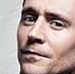

[19, 22]
ryan_gosling
{'ryan_gosling': 1, 'johnny_depp': 1}
./input/known/known/ryan_gosling


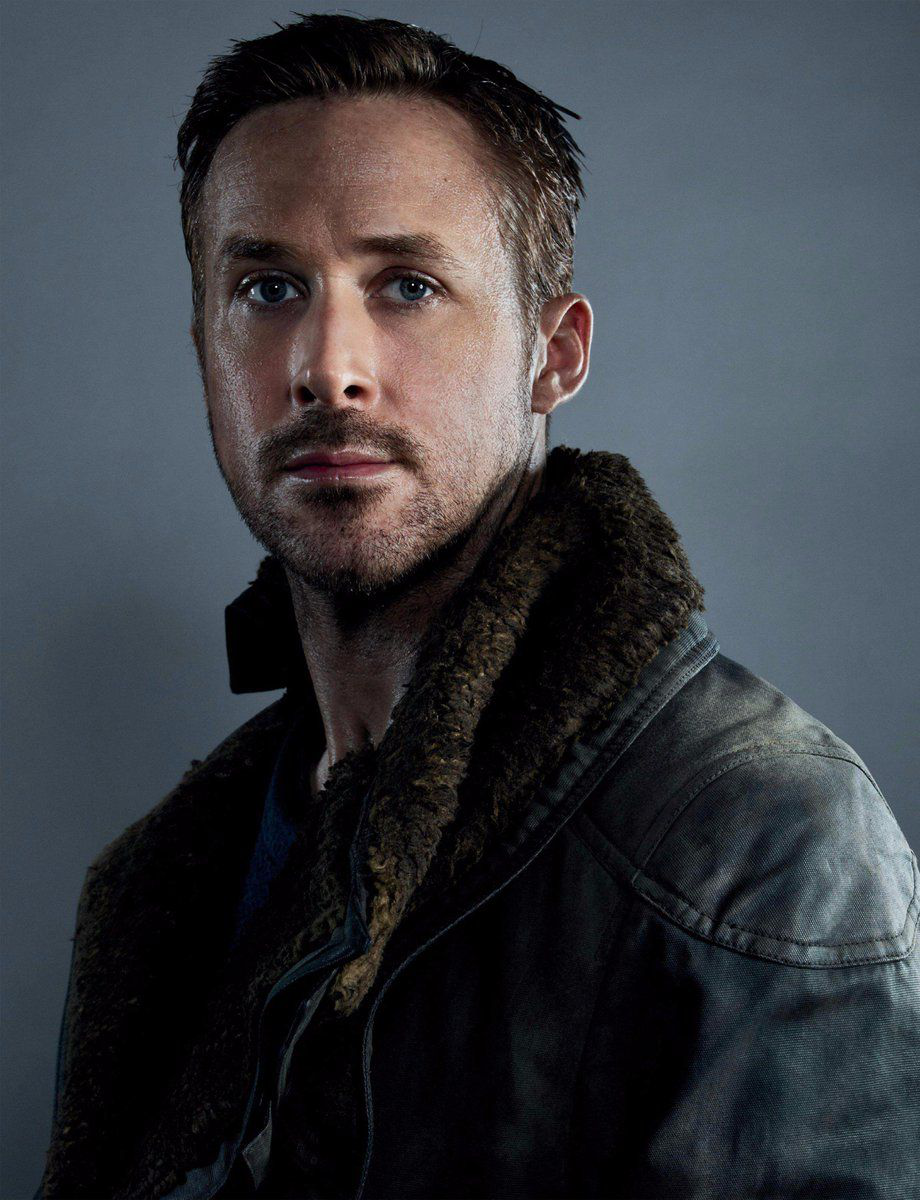

In [332]:
# porównywanie twarzy i zliczanie ilości występowanych zdjęć # kod podebrany z artykułu
image = face_recognition.load_image_file("./input/images/face5.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)

face_encoding = face_recognition.face_encodings(face_image)
names = []
display(pil_face_image)
for encoding in face_encoding:
    matche = face_recognition.compare_faces(data["encodings"], encoding, tolerance=0.7)
    name = "Unknown"
    if True in matche:
        matchedIdxs = [i for (i, b) in enumerate(matche) if b]
        counts = {}
        
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1

        name = max(counts, key=counts.get)

    names.append(name)

print(matchedIdxs)
print(name)
print(counts)
print("./input/known/known/" + names[0])
folder = "./input/known/known/" + names[0]
for asd in glob.iglob(f"{folder}/*"):
    if (asd.endswith(".jpg")):
        continue

image = face_recognition.load_image_file(asd)
pil_image = Image.fromarray(image)
display(pil_image)

matche:  [0.88366276 0.98042553 0.82964734 0.73140403 0.81091951 0.92415281
 0.80872732 0.81673182 0.97124033 0.99688474 1.03583316 0.88792383
 0.80068489 0.77198409 0.70409418 0.7433254  0.82135903 0.77577778
 0.75493565 0.69163188 0.74667091 0.92614964 0.66396067 0.75028572
 0.85285176]
0.6916318760535699
0.6639606727694687
name:  johnny_depp
winer 0.6639606727694687
id winer:  22
best score:  [0.6916318760535699, 0.6639606727694687]
../input/known/known/johnny_depp


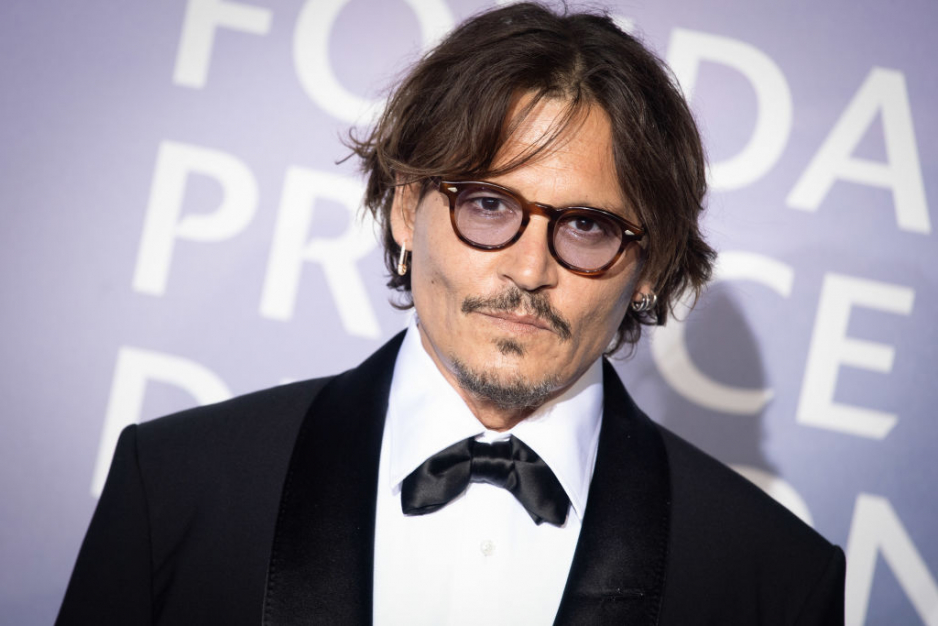

In [335]:
# Porównywanie twarzy z bazą twarzy. Jako output mamy wynik najlepszego podobieństwa, 
# numer id tego zdjęcia, nazwę celebryty i zdjęcie z folderu z jego imieniem
image = face_recognition.load_image_file("./input/images/face5.jpg")
face_locations = face_recognition.face_locations(image)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)

face_encoding = face_recognition.face_encodings(face_image)
scores = []
for encoding in face_encoding:
    matche = face_recognition.face_distance(data["encodings"], encoding)
    print("matche: ", matche)
    name = "Unknown"
    for score in matche:
        i=0
        if score <= 0.7:
            print(score)
            scores.append(score)

    winer = min(scores)
    id_winer = np.where(matche==winer)
    name = data["names"][id_winer[0][0]]

print("name: ", name)
print("winer", winer)
print("id winer: ", id_winer[0][0])
print("best score: ", scores)

print("../input/known/known/" + name)
folder = "./input/known/known/" + name
for i in glob.iglob(f"{folder}/*"):
    if (i.endswith(".jpg")):
        continue

image = face_recognition.load_image_file(i)
pil_image = Image.fromarray(image)
display(pil_image)

In [340]:
# porównywanie pojedynczego zdjęcia 
image = face_recognition.load_image_file("./input/images/face4.jpg")
face_locations = face_recognition.face_locations(image)

for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
face_encoding = face_recognition.face_encodings(face_image)[0]


unknown_image = face_recognition.load_image_file("./input/images/face5.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([face_encoding], unknown_face_encoding, tolerance=0.4)

if result[0]:
    print("True")
else:
    print("False")
    

True


I found 1 face(s) in this photograph.
The chin in this face has the following points: [(773, 66), (770, 73), (769, 80), (768, 89), (768, 98), (768, 107), (770, 115), (773, 121), (779, 124), (790, 125), (802, 124), (813, 121), (823, 116), (830, 108), (834, 99), (837, 89), (840, 79)]
The left_eyebrow in this face has the following points: [(773, 59), (776, 55), (780, 54), (785, 56), (789, 59)]
The right_eyebrow in this face has the following points: [(795, 60), (802, 59), (810, 60), (817, 64), (822, 69)]
The nose_bridge in this face has the following points: [(790, 65), (788, 71), (785, 76), (782, 81)]
The nose_tip in this face has the following points: [(779, 85), (781, 88), (783, 89), (788, 89), (792, 89)]
The left_eye in this face has the following points: [(776, 67), (779, 65), (783, 66), (786, 68), (782, 68), (779, 68)]
The right_eye in this face has the following points: [(801, 71), (806, 69), (810, 71), (813, 73), (809, 74), (805, 73)]
The top_lip in this face has the following po

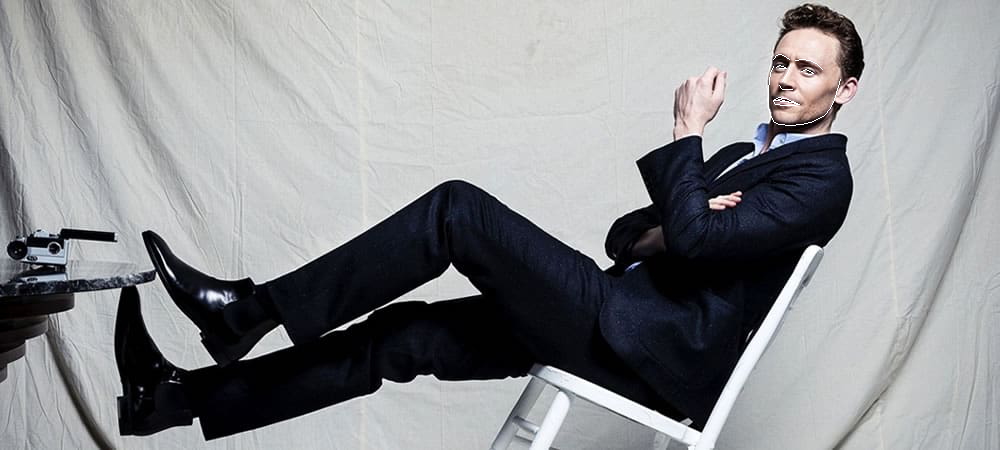

In [331]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image_to_draw = face_recognition.load_image_file(inputDir + "/images/face5.jpg")
# image_to_draw = pil_face_image[:]

# Find all facial features in all the faces in the image
face_landmarks_list_2 = face_recognition.face_landmarks(image_to_draw)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image2 = Image.fromarray(image_to_draw)
d = ImageDraw.Draw(pil_image2)

for face_landmarks in face_landmarks_list_2:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!  
    for facial_feature in face_landmarks.keys():
#         if facial_feature == 'left_eye':
#             d.line((face_landmarks[facial_feature][0],face_landmarks[facial_feature][3]), width=3)
#             d.line((face_landmarks[facial_feature][5],face_landmarks[facial_feature][2]), width=3)
        d.line(face_landmarks[facial_feature], width=1)

# Show the picture
display(pil_image2)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#

In [234]:
#============================ JO
def get_outmost_coordinates(feature_coordinates):
    padding = 20
    return {
        'left': min(feature_coordinates, key=lambda e: e[0])[0] - padding,
        'top': min(feature_coordinates, key=lambda e: e[1])[1] - padding,
        'right': max(feature_coordinates, key=lambda e: e[0])[0] + padding,
        'bottom': max(feature_coordinates, key=lambda e: e[1])[1] + padding,
    }

def crop_feature(landmarks, feature, image):
    if not np.isscalar(feature):
        all_coordinates = {}
        for f in feature:
            all_coordinates[f] = get_outmost_coordinates(landmarks[f])
        
        coordinates = {
            'left': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['left'])]['left'],
            'top': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['top'])]['top'],
            'right': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['right'])]['right'],
            'bottom': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['bottom'])]['bottom'],
        }
    else: 
        coordinates = get_outmost_coordinates(landmarks[feature])
    
    return image.crop(tuple(coordinates.values()))

lewe oko


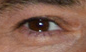

prawe oko


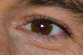

oczy i brwi


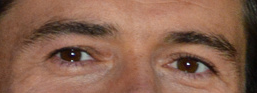

nos


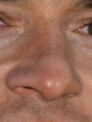

usta


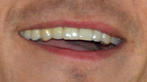

In [238]:
face_landmarks = face_landmarks_list[0]

print("lewe oko")
leftEye = crop_feature(face_landmarks, feature = 'left_eye', image = pil_face_image) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks, feature = 'right_eye', image = pil_face_image)
display(rightEye)

print("oczy i brwi")
eyes = crop_feature(face_landmarks, feature = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow'], image = pil_face_image)
display(eyes)

print("nos")
nose = crop_feature(face_landmarks, feature = ['nose_bridge', 'nose_tip'], image = pil_face_image)
display(nose)

print("usta")
lips = crop_feature(face_landmarks, feature = ['top_lip', 'bottom_lip'], image = pil_face_image)
display(lips)

lewe oko


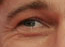

prawe oko


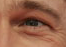

nos


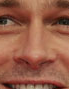

usta


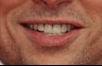

lewe oko


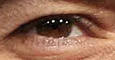

prawe oko


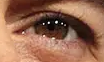

nos


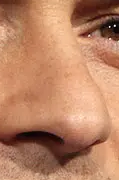

usta


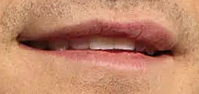

[False, True, True, False]
[(59, 64), (75, 57), (91, 58), (105, 68), (90, 69), (73, 68)]
[0.66758679 0.35883169 0.56262264 0.60061528]


In [243]:
# to wszystko jest w ramach testu, ten cell mozna wyrzucic
# robie kopiuj wklej bo to powinno byc zrealizonane przez czarka
image2nd = face_recognition.load_image_file(inputDir + "/brad_pitt/brad.jpg")
image3rd = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_2.jpg")

face_locations_2nd = face_recognition.face_locations(image2nd)
face_locations_3rd = face_recognition.face_locations(image3rd)

for face_location in face_locations_2nd:
    top, right, bottom, left = face_location
    face_image_2 = image2nd[top:bottom, left:right]
    pil_face_image_2 = Image.fromarray(face_image_2)
    
for face_location in face_locations_3rd:
    top, right, bottom, left = face_location
    face_image_3 = image3rd[top:bottom, left:right]
    pil_face_image_3 = Image.fromarray(face_image_3)
    
face_landmarks_list_2 = face_recognition.face_landmarks(face_image_2, model='large')
face_landmarks_list_3 = face_recognition.face_landmarks(face_image_3, model='large')


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_2[0], feature = 'left_eye', image = pil_face_image_2) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_2[0], feature = 'right_eye', image = pil_face_image_2)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_2[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_2)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_2[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_2)
display(lips)


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = 'left_eye', image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_3[0], feature = 'right_eye', image = pil_face_image_3)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_3[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_3)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_3[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_3)
display(lips)


image4 = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_3.png")
image5 = face_recognition.load_image_file(inputDir + "/orlando_bloom/tego_nie_rozpoznaje_przy_defaultowych_wartosciach.jpg") #Orlando_Bloom_4
face_locations_4 = face_recognition.face_locations(image4)
face_locations_5 = face_recognition.face_locations(image5)
enc_4 = face_recognition.face_encodings(image4, face_locations_4, model='large')
enc_5 = face_recognition.face_encodings(image5, face_locations_5, model='large')

face_encodings = [ 
    face_recognition.face_encodings(image2nd, face_locations_2nd, model='large')[0], 
    face_recognition.face_encodings(image3rd, face_locations_3rd, model='large')[0], 
    face_recognition.face_encodings(image4, face_locations_4, model='large')[0], 
    face_recognition.face_encodings(image5, face_locations_5, model='large')[0], 
]
face_encoding = face_recognition.face_encodings(image, face_locations, model='large')[0]

print(face_recognition.compare_faces(face_encodings, face_encoding))

# single feature
print(face_landmarks['left_eye'])
print(face_recognition.face_distance(face_encodings, face_encoding))


lewe oko


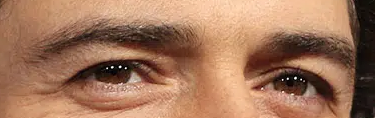

[(201, 409, 468, 141)] [(0, 0, 375, 118)]
[array([-0.05102115,  0.09309785,  0.035631  ,  0.02021889, -0.07377174,
       -0.08950807, -0.0388397 , -0.04007498,  0.12158279, -0.01194712,
        0.23974016, -0.00199662, -0.21627599, -0.11585219,  0.00497689,
        0.09128544, -0.13254835, -0.03140263, -0.14727305, -0.13569698,
        0.01178715,  0.00467167,  0.02531587, -0.00450719, -0.13719919,
       -0.22485466, -0.08057653, -0.13524321,  0.09316476, -0.181622  ,
        0.03359182,  0.05611412, -0.18378659, -0.09528784, -0.01930109,
        0.01821876,  0.02108023, -0.06470916,  0.13138813, -0.01911601,
       -0.10490654, -0.01982196, -0.02789382,  0.25789967,  0.18574366,
        0.00407232,  0.00391617, -0.06259908,  0.0972333 , -0.24176195,
        0.00592358,  0.1232119 ,  0.0760415 ,  0.09440633,  0.04516409,
       -0.14981568,  0.04080665,  0.11314067, -0.18805796,  0.01312431,
        0.0235003 , -0.06354661, -0.08675709, -0.08200653,  0.21256094,
        0.08775183, -

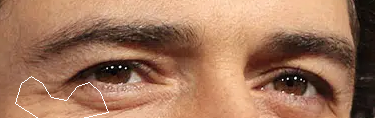

In [308]:
### testujemy czy mozemy wykorzystac czesc encodingu tworzonego przez dlib resnet34
# ta czesc jest zabrana z face_recognition lib - start

import dlib
import face_recognition_models

predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)

face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

face_detector = dlib.get_frontal_face_detector()

def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])

def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of dlib 'rect' objects of found face locations
    """
    if model == "cnn":
        return cnn_face_detector(img, number_of_times_to_upsample)
    else:
        return face_detector(img, number_of_times_to_upsample)

    
def _raw_face_landmarks(face_image, face_locations=None, model="large"):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [_css_to_rect(face_location) for face_location in face_locations]

    pose_predictor = pose_predictor_68_point

    if model == "small":
        pose_predictor = pose_predictor_5_point

    return [pose_predictor(face_image, face_location) for face_location in face_locations]


def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):
    """
    Given an image, return the 128-dimension face encoding for each face in the image.
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :param model: Optional - which model to use. "large" or "small" (default) which only returns 5 points but is faster.
    :return: A list of 128-dimensional face encodings (one for each face in the image)
    """
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]

enc = face_recognition.face_encodings(image3rd, face_locations_3rd, model='large')[0]
own_enc = face_encodings(image3rd, face_locations_3rd, model='large')[0]

# print(enc == own_enc)


### ta czesc jest zabrana z face_recognition lib - end

# encoding tylko czesci ciala

print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow'], image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)
path = inputDir + '/orlando_bloom/left_eye.jpg'
leftEye.save(path)

partialImage = face_recognition.load_image_file(path)
face_locations_partial = face_recognition.face_locations(partialImage)

dimensions = tuple([0, 0, leftEye.size[0], leftEye.size[1]])

print(face_locations, [dimensions])

raw_landmarks = _raw_face_landmarks(image3rd, [dimensions], 'large')
partial_enc = [np.array(face_encoder.compute_face_descriptor(image3rd, raw_landmark_set, 1)) for raw_landmark_set in raw_landmarks]
print(partial_enc)

partial_landmarks = face_recognition.face_landmarks(image3rd, [dimensions], 'large')

landmarks_as_tuples = [[(p.x, p.y) for p in landmark.parts()] for landmark in raw_landmarks]
print(landmarks_as_tuples[0], len(landmarks_as_tuples[0]))


pil_image = leftEye #Image.fromarray(leftEye)
d = ImageDraw.Draw(pil_image)

d.polygon(landmarks_as_tuples[0])
# for point in landmarks_as_tuples[0]:
#     d.point(point)
    
display(pil_image) # wrong result, we can't use this to determine encoding
# 1. can we determine which part of encoding is the eye?
# 2. can we use different comparision? or different encoding system, and only use face_recognition for creating smaller images 
# 3. perhaps model can be changed and instead of whole face, we can use one that was trained only for noses, eyes, mouths etc

In [664]:
# 1. can we determine which part of encoding is the eye? - no we cannot, it's a deep learning model, therefore it decides
# what distance it gives what weights and we cannot access this knowledge

# 2 - yes. feature vectorization, I am going to go w/ this approach below

# ============================ comparing only single feature of face

# ======= ten fragment kodu to funkcje pomocnicze stąd: https://github.com/nlhkh/face-alignment-dlib/blob/master/utils.py
LEFT_EYE_INDICES = [36, 37, 38, 39, 40, 41]
RIGHT_EYE_INDICES = [42, 43, 44, 45, 46, 47]

def angle_between_2_points(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    tan = (y2 - y1) / (x2 - x1)
    return np.degrees(np.arctan(tan))

def extract_eye(shape, eye_indices):
    points = map(lambda i: shape.part(i), eye_indices)
    return list(points)

def extract_eye_center(shape, eye_indices):
    points = extract_eye(shape, eye_indices)
    xs = map(lambda p: p.x, points)
    ys = map(lambda p: p.y, points)
    return sum(xs) // 6, sum(ys) // 6

def extract_left_eye_center(shape):
    return extract_eye_center(shape, LEFT_EYE_INDICES)

def extract_right_eye_center(shape):
    return extract_eye_center(shape, RIGHT_EYE_INDICES)

def get_rotation_matrix(p1, p2):
    angle = angle_between_2_points(p1, p2)
    x1, y1 = p1
    x2, y2 = p2
    xc = (x1 + x2) // 2
    yc = (y1 + y2) // 2
    M = cv2.getRotationMatrix2D((xc, yc), angle, 1)
    return M
# ===== koniec kodu z gh

tempDir = inputDir + '/temp'
features_to_mark = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow']
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
desired_width = 256
padding = 20
    
def get_face_image(face_location, image):
    top, right, bottom, left = face_location
    return image.crop((left, top, right, bottom))

def draw_landmarks(face_landmarks, image, color='white'):
    drawn_image = Image.fromarray(image)
    d = ImageDraw.Draw(drawn_image)
    for facial_feature in face_landmarks.keys():
        if facial_feature in features_to_mark:
            d.line(face_landmarks[facial_feature], width=1, fill=color)
    return drawn_image

def preprocess_image(path_to_image):
    preprocessed_image = cv2.imread(inputDir + path_to_image, cv2.IMREAD_GRAYSCALE)
    height, width = preprocessed_image.shape[:2]
    
    detected_faces = detector(preprocessed_image, 1)
    if len(detected_faces) == 0:
        display(Image.fromarray(preprocessed_image))
        raise Exception('empty face – ', path_to_image)
        
    shape = predictor(preprocessed_image, detected_faces[0]) # obslugujemy tylko case 1 twarz wykryta zawsze
    
    left_eye = extract_left_eye_center(shape)
    right_eye = extract_right_eye_center(shape)
    M = get_rotation_matrix(left_eye, right_eye)
    rotated = cv2.warpAffine(preprocessed_image, M, (width, height), flags=cv2.INTER_CUBIC)
    
    if not cv2.imwrite(tempDir + path_to_image, rotated):
        raise Exception('Could not write image - there is a good chance you forgot to create directory') # uwaga, folder musi istniec, cv2 nie utworzy go i wyrzuci ten blad
    
def resize_image(image):
    return imutils.resize(np.asarray(image), width=desired_width) 
        
def get_resize_scale(pre_process, post_process):
    pre_width, pre_height = pre_process.size
    post_width, post_height = post_process.size    
    return post_width / pre_width

def scale_landmarks(face_landmarks, scale):
    # here I added round for better debug, it may affect results
    return { feature: [ tuple([round(scale*coord) for coord in point]) for point in points_list] for feature, points_list in face_landmarks.items() }

def get_min_max_values(face_landmarks):
    min_x = face_landmarks['left_eye'][0][0]
    max_x = face_landmarks['left_eye'][0][0]
    max_y = face_landmarks['left_eye'][0][1]
    min_y = face_landmarks['left_eye'][0][1]
    for feature, points_list in face_landmarks.items():
        if feature not in features_to_mark: 
            continue
            
        for point in points_list:
            if point[0] < min_x:
                min_x = point[0]
            if point[0] > max_x:
                max_x = point[0]
            if point[1] < min_y:
                min_y = point[1]
            if point[1] > max_y:
                max_y = point[1]
    
    return min_x, max_x, min_y, max_y

def shift_origin_of_mask(face_landmarks, scale):
    min_x, max_x, min_y, max_y = get_min_max_values(face_landmarks)
                
#     do ewentualnej wizualizacji roznic oczu mozna transformowac w kierunku np kacika lewego oka
#     destination_x_for_right_corner_of_left_eye = 25
#     outmost_left_eye_point = max(face_landmarks['left_eye'], key=lambda e: e[0])
    
    return { feature: [ (point[0]-min_x, point[1]-min_y) for point in points_list] for feature, points_list in face_landmarks.items() }

def prepare_own_encoding(face_landmarks):
    min_x, max_x, min_y, max_y = get_min_max_values(face_landmarks)
    
    outminimal_x_left_eye_point = min(face_landmarks['left_eye'], key=lambda e: e[0])
    outmost_x_left_eye_point = max(face_landmarks['left_eye'], key=lambda e: e[0])
    outminimal_y_left_eye_point = min(face_landmarks['left_eye'], key=lambda e: e[1])
    outmost_y_left_eye_point = max(face_landmarks['left_eye'], key=lambda e: e[1])
    
    outminimal_x_right_eye_point = min(face_landmarks['right_eye'], key=lambda e: e[0])
    outmost_x_right_eye_point = max(face_landmarks['right_eye'], key=lambda e: e[0])
    outminimal_y_right_eye_point = min(face_landmarks['right_eye'], key=lambda e: e[1])
    outmost_y_right_eye_point = max(face_landmarks['right_eye'], key=lambda e: e[1])
    
    outminimal_x_left_eyebrow_point = min(face_landmarks['left_eyebrow'], key=lambda e: e[0])
    outmost_x_left_eyebrow_point = max(face_landmarks['left_eyebrow'], key=lambda e: e[0])
    outminimal_y_left_eyebrow_point = min(face_landmarks['left_eyebrow'], key=lambda e: e[1])
    outmost_y_left_eyebrow_point = max(face_landmarks['left_eyebrow'], key=lambda e: e[1])
    
    outminimal_x_right_eyebrow_point = min(face_landmarks['right_eyebrow'], key=lambda e: e[0])
    outmost_x_right_eyebrow_point = max(face_landmarks['right_eyebrow'], key=lambda e: e[0])
    outminimal_y_right_eyebrow_point = min(face_landmarks['right_eyebrow'], key=lambda e: e[1])
    outmost_y_right_eyebrow_point = max(face_landmarks['right_eyebrow'], key=lambda e: e[1])
    
    encoding = {
        'amplituda_x': max_x,
        'amplituda_y': max_y,
        'lewe_oko_szerokosc': outmost_x_left_eye_point[0]-outminimal_x_left_eye_point[0],
        'lewe_oko_wysokosc': outmost_y_left_eye_point[1]-outminimal_y_left_eye_point[1],
        'prawe_oko_szerokosc': outmost_x_right_eye_point[0]-outminimal_x_right_eye_point[0],
        'prawe_oko_wysokosc': outmost_y_right_eye_point[1]-outminimal_y_right_eye_point[1],
        'odleglosc_miedzy_oczami': outmost_x_right_eye_point[0] - outmost_x_left_eye_point[1],
        'lewa_brew_dlugosc': outmost_x_left_eyebrow_point[0]-outminimal_x_left_eyebrow_point[0],
        'lewa_brew_szerokosc': outmost_y_left_eyebrow_point[1]-outminimal_y_left_eyebrow_point[1],
        'prawa_brew_dlugosc': outmost_x_right_eyebrow_point[0]-outminimal_x_right_eyebrow_point[0],
        'prawa_brew_szerokosc': outmost_y_right_eyebrow_point[1]-outminimal_y_right_eyebrow_point[1],
        'lewa_brew_odleglosc_punktow_wychylonych': outminimal_x_left_eyebrow_point[1] - outmost_x_left_eyebrow_point[1],
        'prawa_brew_odleglosc_punktow_wychylonych': outmost_x_right_eyebrow_point[1] - outminimal_x_right_eyebrow_point[1],
        'odleglosc_miedzy_brwiami': outminimal_x_right_eyebrow_point[0] - outmost_x_left_eyebrow_point[0],
    }
    
    return encoding
    

# preprocessing image - turn to grayscale & rotate so eyes are in straight line 

preprocess_image('/orlando_bloom/Orlando_Bloom.jpg')
preprocess_image('/brad_pitt/brad.jpg')
preprocess_image('/orlando_bloom/Orlando_Bloom_2.jpg')
preprocess_image('/johnny_depp/johnny_depp_2.jpg')

# preparing photo w/ landmark mask

image_orlando_1 = face_recognition.load_image_file(tempDir + "/orlando_bloom/Orlando_Bloom.jpg")
image_pitt = face_recognition.load_image_file(tempDir + "/brad_pitt/brad.jpg")
image_orlando_2 = face_recognition.load_image_file(tempDir + "/orlando_bloom/Orlando_Bloom_2.jpg")
image_depp = face_recognition.load_image_file(tempDir + "/johnny_depp/johnny_depp_2.jpg")

face_location_orlando_1 = face_recognition.face_locations(image_orlando_1)[0]
face_location_pitt = face_recognition.face_locations(image_pitt)[0]
face_location_orlando_2 = face_recognition.face_locations(image_orlando_2)[0]
face_location_depp = face_recognition.face_locations(image_depp)[0]

face_landmarks_orlando_1 = face_recognition.face_landmarks(image_orlando_1, model='large')[0]
face_landmarks_pitt = face_recognition.face_landmarks(image_pitt, model='large')[0]
face_landmarks_orlando_2 = face_recognition.face_landmarks(image_orlando_2, model='large')[0]
face_landmarks_depp = face_recognition.face_landmarks(image_depp, model='large')[0]

face_image_orlando_1 = draw_landmarks(face_landmarks_orlando_1, image_orlando_1)
# face_image_orlando_1 = get_face_image(face_location_orlando_1, face_image_orlando_1)
face_image_pitt = draw_landmarks(face_landmarks_pitt, image_pitt)
# face_image_pitt = get_face_image(face_location_pitt, face_image_pitt)
face_image_orlando_2 = draw_landmarks(face_landmarks_orlando_2, image_orlando_2)
# face_image_orlando_2 = get_face_image(face_location_orlando_2, face_image_orlando_2)
face_image_depp = draw_landmarks(face_landmarks_depp, image_depp)

# display(face_image_orlando_1)
# display(face_image_pitt)
# display(face_image_orlando_2)

# extracting feature

eyes_orlando_1 = crop_feature(face_landmarks_orlando_1, feature = features_to_mark, image = face_image_orlando_1)
eyes_pitt = crop_feature(face_landmarks_pitt, feature = features_to_mark, image = face_image_pitt)
eyes_orlando_2 = crop_feature(face_landmarks_orlando_2, feature = features_to_mark, image = face_image_orlando_2)
eyes_depp = crop_feature(face_landmarks_depp, feature = features_to_mark, image = face_image_depp)

# display(eyes_orlando_1)
# display(eyes_pitt)
# display(eyes_orlando_2)
# display(eyes_depp)

# calculating feature vector

# we should always have padding around outliers of eyes/eyebrows so we only care about scaling
# these images to same width (we are sure these are in same position already)
resized_eyes_orlando_1 = Image.fromarray(resize_image(eyes_orlando_1))
resized_eyes_pitt = Image.fromarray(resize_image(eyes_pitt))
resized_eyes_orlando_2 = Image.fromarray(resize_image(eyes_orlando_2))
resized_eyes_depp = Image.fromarray(resize_image(eyes_depp))

display(resized_eyes_orlando_1)
display(resized_eyes_pitt)
display(resized_eyes_orlando_2)
display(resized_eyes_depp)

# get scale to scale down mask too? if we want to calculate based on them

print('left eye orlando 1 - ', face_landmarks_orlando_1['left_eye'])
print('left eye pitt - ', face_landmarks_pitt['left_eye'])
print('left eye orlando 2 - ', face_landmarks_orlando_2['left_eye'])
print('left eye depp - ', face_landmarks_depp['left_eye'])

scale_orlando_1 = get_resize_scale(eyes_orlando_1, resized_eyes_orlando_1)
scale_pitt = get_resize_scale(eyes_pitt, resized_eyes_pitt)
scale_orlando_2 = get_resize_scale(eyes_orlando_2, resized_eyes_orlando_2)
scale_depp = get_resize_scale(eyes_depp, resized_eyes_depp)

print(scale_orlando_1, scale_pitt, scale_orlando_2, scale_depp)

rescaled_face_landmarks_orlando_1 = shift_origin_of_mask(scale_landmarks(face_landmarks_orlando_1, scale_orlando_1), scale_orlando_1)
rescaled_face_landmarks_pitt = shift_origin_of_mask(scale_landmarks(face_landmarks_pitt, scale_pitt), scale_pitt)
rescaled_face_landmarks_orlando_2 = shift_origin_of_mask(scale_landmarks(face_landmarks_orlando_2, scale_orlando_2), scale_orlando_2)
rescaled_face_landmarks_depp = shift_origin_of_mask(scale_landmarks(face_landmarks_depp, scale_depp), scale_depp)

print('after scaling')
print('left eyebrow orlando 1 - ', rescaled_face_landmarks_orlando_1['left_eyebrow'])
print('left eyebrow pitt - ', rescaled_face_landmarks_pitt['left_eyebrow'])
print('left eyebrow orlando 2 - ', rescaled_face_landmarks_orlando_2['left_eyebrow'])
print('left eyebrow depp - ', rescaled_face_landmarks_depp['left_eyebrow'])

black_board = Image.new('RGB', (250, 100), 'black')
# drawing = draw_landmarks(face_landmarks_orlando_1, np.array(black_board))
drawing = draw_landmarks(rescaled_face_landmarks_orlando_1, np.array(drawing), 'red')
drawing = draw_landmarks(rescaled_face_landmarks_pitt, np.array(drawing), 'white')
drawing = draw_landmarks(rescaled_face_landmarks_orlando_2, np.array(drawing), 'blue')
drawing = draw_landmarks(rescaled_face_landmarks_depp, np.array(drawing), 'yellow')
display(drawing)

# drawing_pitt = draw_important_landmarks(rescaled_face_landmarks_pitt, np.array(resized_eyes_pitt))
# display(drawing_pitt)

# comparing feature vectors using euclidean distance

### here are some tests I made to get familiar with euclidean distance – there are of no importance

orlando_distances = distance.cdist(rescaled_face_landmarks_orlando_1['left_eye'], rescaled_face_landmarks_orlando_1['left_eye'], 'euclidean')
orlando_right_distances = distance.cdist(rescaled_face_landmarks_orlando_1['right_eye'], rescaled_face_landmarks_orlando_1['right_eye'], 'euclidean')

orlando2_distances = distance.cdist(rescaled_face_landmarks_orlando_2['left_eye'], rescaled_face_landmarks_orlando_2['left_eye'], 'euclidean')
depp_distances = distance.cdist(rescaled_face_landmarks_depp['left_eye'], rescaled_face_landmarks_depp['left_eye'], 'euclidean')
pitt_distances = distance.cdist(rescaled_face_landmarks_pitt['left_eye'], rescaled_face_landmarks_pitt['left_eye'], 'euclidean')
pitt_2_distances = distance.cdist(rescaled_face_landmarks_pitt['right_eye'], rescaled_face_landmarks_pitt['right_eye'], 'euclidean')

# print(sum(orlando_distances - orlando2_distances))
# print(sum(orlando_distances - depp_distances))
# print(orlando2_distances) # these are element against element, we only need upper triangle as it is its clone then
# print(depp_distances)

print('vs right eye orlando', (np.linalg.norm(orlando_distances - orlando_right_distances))) # shall we sum it?
# no, these are exact same point - point comparision probably

# let's check how AI probably chooses those distances 
# and how dlib then compares (why it gets only 1 value instead of several -> it probably reduces points ealier)

# just distance between left eyes?
# distance between left eye outmost and eye right outmost
# eyebrow shape
print('orlando 1', rescaled_face_landmarks_orlando_1['left_eye'])
print('orlando 2', rescaled_face_landmarks_orlando_2['left_eye'])
print(distance.cdist(rescaled_face_landmarks_orlando_1['left_eye'], rescaled_face_landmarks_orlando_2['left_eye'], 'euclidean'))

print('vs pitt', (np.linalg.norm(orlando_distances - pitt_distances)))
print('pitt left vs pitt right', (np.linalg.norm(pitt_distances - pitt_2_distances)))
print('vs depp', (np.linalg.norm(orlando_distances - depp_distances)))
print('vs orlando', (np.linalg.norm(orlando_distances - orlando2_distances)))

[ WARN:0@38695.909] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/orlando_bloom/Orlando_Bloom.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [623]:
def sum_comparision(values_1, values_2):
    return sum(abs(number) for number in np.array(list(values_1)) - np.array(list(values_2)))

encoding_orlando_1 = prepare_own_encoding(rescaled_face_landmarks_orlando_1)
encoding_pitt = prepare_own_encoding(rescaled_face_landmarks_pitt)
encoding_orlando_2 = prepare_own_encoding(rescaled_face_landmarks_orlando_2)
encoding_depp = prepare_own_encoding(rescaled_face_landmarks_depp)

print(encoding_orlando_1)
print(encoding_orlando_2)

print(sum_comparision(encoding_orlando_1.values(), encoding_orlando_2.values()))
print(sum_comparision(encoding_orlando_1.values(), encoding_depp.values()))
print(sum_comparision(encoding_orlando_1.values(), encoding_pitt.values()))
print(sum_comparision(encoding_depp.values(), encoding_pitt.values()))

print(np.linalg.norm(np.array(list(encoding_orlando_1.values())) - np.array(list(encoding_orlando_2.values()))))
print(np.linalg.norm(np.array(list(encoding_orlando_1.values())) - np.array(list(encoding_depp.values()))))

### testy zapoznajace sie koncza sie

# modelowanie

encoding_orlando_1['person_name'] = 'orlando bloom'
encoding_pitt['person_name'] = 'brad pitt'
# encoding_orlando_2['person_name'] = 'orlando bloom'
encoding_depp['person_name'] = 'johnny depp'

people = pd.DataFrame([encoding_orlando_1, encoding_pitt, encoding_depp])

# knn doesn't need training for generalization so we can use it with as little data as we have here 
# although it would be a lot better to have more time for running these operations on more datasets

y = people['person_name']
x = people.drop(columns='person_name')

# wiecej danych jest potrzebnych zeby to zfitowac

# dane mozna jeszcze znormalizowac min/maxem albo ustandaryzowac standardscalerem (skoro mamy ujemne to ppnie standardscalerem) 
# dla lepszych wynikow

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x, y)
result = model.predict(np.array(list(encoding_orlando_2.values())).reshape(1, -1))
print(result)

#============================ koniec JO

{'amplituda_x': 217, 'amplituda_y': 42, 'lewe_oko_szerokosc': 43, 'lewe_oko_wysokosc': 12, 'prawe_oko_szerokosc': 44, 'prawe_oko_wysokosc': 13, 'odleglosc_miedzy_oczami': 153, 'lewa_brew_dlugosc': 102, 'lewa_brew_szerokosc': 28, 'prawa_brew_dlugosc': 82, 'prawa_brew_szerokosc': 28, 'lewa_brew_odleglosc_punktow_wychylonych': 21, 'prawa_brew_odleglosc_punktow_wychylonych': 20, 'odleglosc_miedzy_brwiami': 33}
{'amplituda_x': 229, 'amplituda_y': 47, 'lewe_oko_szerokosc': 48, 'lewe_oko_wysokosc': 13, 'prawe_oko_szerokosc': 42, 'prawe_oko_wysokosc': 13, 'odleglosc_miedzy_oczami': 166, 'lewa_brew_dlugosc': 124, 'lewa_brew_szerokosc': 35, 'prawa_brew_dlugosc': 73, 'prawa_brew_szerokosc': 27, 'lewa_brew_odleglosc_punktow_wychylonych': 28, 'prawa_brew_odleglosc_punktow_wychylonych': 19, 'odleglosc_miedzy_brwiami': 32}
86
141
143
174
32.155870381627054
47.989582202807306
['orlando bloom']


/Users/justynaowczarek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [667]:
# funkcje dla mierzenia LFW

def reshape_single_encoding(encoding):
    return np.array(list(encoding.values())).reshape(1, -1)

def process_image(image_path):
    preprocess_image(image_path)
    image = face_recognition.load_image_file(tempDir + image_path)
    
    face_location = face_recognition.face_locations(image)[0] # we assume it's always one face
    face_landmarks = face_recognition.face_landmarks(image, model='large')[0]

    face_image = draw_landmarks(face_landmarks, image)

    eyes = crop_feature(face_landmarks, feature = features_to_mark, image = face_image)
    resized_eyes = Image.fromarray(resize_image(eyes))
        
#     display(resized_eyes)
    
    scale = get_resize_scale(eyes, resized_eyes)
    rescaled_face_landmarks = shift_origin_of_mask(scale_landmarks(face_landmarks, scale), scale)
    
    encoding = prepare_own_encoding(rescaled_face_landmarks)
    
    return encoding

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/German_Khan/German_Khan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stefano_Gabbana/Stefano_Gabbana_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dragan_Covic/Dragan_Covic_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeff_Hornacek/Jeff_Hornacek_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sureyya_Ayhan/Sureyya_Ayhan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Deb_Santos/Deb_Santos_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Newhart/Bob_Newhart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wang_Hailan/Wang_Hailan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_ONeill/Paul_ONeill_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_ONeill/Paul_ONeill_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_ONeill/Paul_ONeill_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_ONeill/Paul_ONeill_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_ONeill/Paul_ONeill_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Horace_Newcomb/Horace_Newcomb_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammad_Fares/Mohammad_Fares_0001.jpg


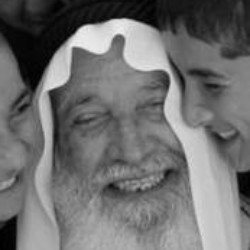

('empty face – ', '/Mohammad_Fares/Mohammad_Fares_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/JK_Rowling/JK_Rowling_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/JK_Rowling/JK_Rowling_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/JK_Rowling/JK_Rowling_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/JK_Rowling/JK_Rowling_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/JK_Rowling/JK_Rowling_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/JK_Rowling/JK_Rowling_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shinya_Taniguchi/Shinya_Taniguchi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Curtis/Tony_Curtis_0002.jpg
/Users/justynaowczarek/Develo

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeong_Se-hyun/Jeong_Se-hyun_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeong_Se-hyun/Jeong_Se-hyun_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeong_Se-hyun/Jeong_Se-hyun_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Rogers/Charles_Rogers_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Rosser/Eric_Rosser_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Rosser/Eric_Rosser_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ziwang_Xu/Ziwang_Xu_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Pleau/Larry_Pleau_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów

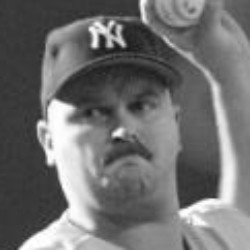

('empty face – ', '/David_Wells/David_Wells_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Wells/David_Wells_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Wells/David_Wells_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Wells/David_Wells_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Wells/David_Wells_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Wells/David_Wells_0004.jpg


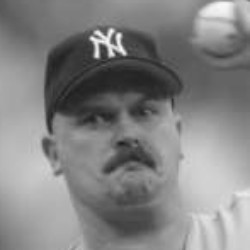

('empty face – ', '/David_Wells/David_Wells_0004.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Alencar/Jose_Alencar_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Raul_Gonzalez/Raul_Gonzalez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alex_Popov/Alex_Popov_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anne_Donovan/Anne_Donovan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vin_Diesel/Vin_Diesel_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vin_Diesel/Vin_Diesel_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stuart_Whitman/Stuart_Whitman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesse_Jackson/Jesse_Jackson_0003.jpg
/Users/justynaowczare

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Manuel_Jesus/Manuel_Jesus_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Giovanny_Cordoba/Giovanny_Cordoba_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Sensenbrenner/James_Sensenbrenner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennie_Finch/Jennie_Finch_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Westerfield/David_Westerfield_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Costas_Simitis/Costas_Simitis_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Costas_Simitis/Costas_Simitis_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Costas_Simitis/Costas_Simitis_0006.jpg
/Users/justynaowczarek/Devel

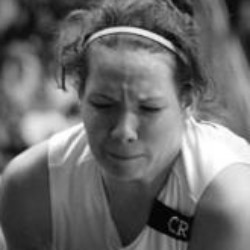

('empty face – ', '/Beth_Jones/Beth_Jones_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Beth_Jones/Beth_Jones_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brock_Berlin/Brock_Berlin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_McPherson/James_McPherson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Geoff_Hoon/Geoff_Hoon_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Geoff_Hoon/Geoff_Hoon_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Geoff_Hoon/Geoff_Hoon_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Geoff_Hoon/Geoff_Hoon_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Geoff_Hoon/Geoff_Hoon_0004.jpg
/Users/justynaowczarek/Development/st

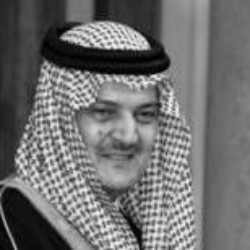

('empty face – ', '/Saoud_Al_Faisal/Saoud_Al_Faisal_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sebastian_Saja/Sebastian_Saja_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sebastian_Saja/Sebastian_Saja_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sebastian_Saja/Sebastian_Saja_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Wagoner/Rick_Wagoner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Wagoner/Rick_Wagoner_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Don_Henley/Don_Henley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Baldacci/John_Baldacci_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dustin_Brown/Dustin_Brown_0001.jpg

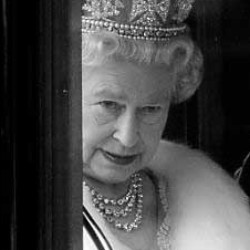

('empty face – ', '/Queen_Elizabeth_II/Queen_Elizabeth_II_0008.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Queen_Elizabeth_II/Queen_Elizabeth_II_0010.jpg
/Users/justynaowczarek/Development/

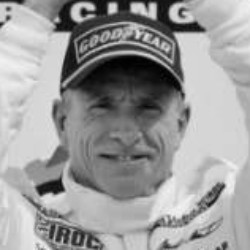

('empty face – ', '/Mark_Martin/Mark_Martin_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Din_Samsudin/Din_Samsudin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jason_Statham/Jason_Statham_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Bair/Mike_Bair_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Yana_Klochkova/Yana_Klochkova_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Doug_Racine/Doug_Racine_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chan_Ho_Park/Chan_Ho_Park_0001.jpg


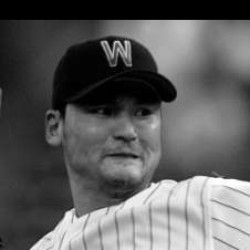

('empty face – ', '/Chan_Ho_Park/Chan_Ho_Park_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elena_Likhovtseva/Elena_Likhovtseva_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Ebert/Paul_Ebert_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anita_DeFrantz/Anita_DeFrantz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lee_Nam-shin/Lee_Nam-shin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Crispin_Glover/Crispin_Glover_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kevin_Marshall/Kevin_Marshall_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sven_Ottke/Sven_Ottke_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Raf_Vallone/Raf_Vallone_0001.jpg
/Us

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Keck/Donald_Keck_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/katrin_winnick/katrin.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Roddick/Andy_Roddick_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Roddick/Andy_Roddick_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Roddick/Andy_Roddick_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Roddick/Andy_Roddick_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Roddick/Andy_Roddick_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Roddick/Andy_Roddick_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/An

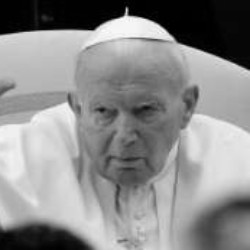

('empty face – ', '/John_Paul_II/John_Paul_II_0007.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Paul_II/John_Paul_II_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Paul_II/John_Paul_II_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Tracy/Paul_Tracy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ismail_Khan/Ismail_Khan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Svetislav_Pesic/Svetislav_Pesic_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sven_Goran_Eriksson/Sven_Goran_Eriksson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aline_Chretien/Aline_Chretien_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeffery_Hendren/Jeffery_Hendren_

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Penelope_Ann_Miller/Penelope_Ann_Miller_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Penelope_Ann_Miller/Penelope_Ann_Miller_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Juniardi/Natalie_Juniardi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ted_Maher/Ted_Maher_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ted_Maher/Ted_Maher_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Noor_Mohammed/Noor_Mohammed_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Walt_Harris/Walt_Harris_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Olivera_Labus/Olivera_Labus_0001.jpg
/Users/justynaowczarek/Development/studia/prze

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Cheney/Dick_Cheney_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Cheney/Dick_Cheney_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Cheney/Dick_Cheney_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Cheney/Dick_Cheney_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Cheney/Dick_Cheney_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Cheney/Dick_Cheney_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamza_Atiya_Muhsen/Hamza_Atiya_Muhsen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Hilt/David_Hilt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/i

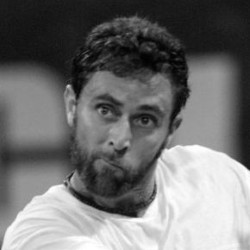

('empty face – ', '/Felix_Mantilla/Felix_Mantilla_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Frank_Van_Ecke/Frank_Van_Ecke_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Sherman/Mike_Sherman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Myers/David_Myers_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Myers/David_Myers_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Ruiz_Polanco/Guillermo_Ruiz_Polanco_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ken_Loach/Ken_Loach_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Flodquist/Robert_Flodquist_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ben_Lee/Ben_Lee_0001.jpg

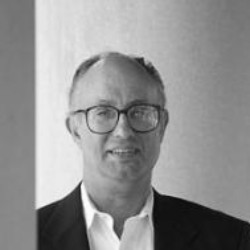

('empty face – ', '/Jeffrey_Pfeffer/Jeffrey_Pfeffer_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brandon_Boyd/Brandon_Boyd_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Jeffords/Jim_Jeffords_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Claudio_Abbado/Claudio_Abbado_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chen_Liang_Yu/Chen_Liang_Yu_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chen_Liang_Yu/Chen_Liang_Yu_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Maura_Tierney/Maura_Tierney_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Danforth/John_Danforth_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cheryl_Hines/Cheryl_Hines_0001.j

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Linney/Laura_Linney_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Linney/Laura_Linney_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Linney/Laura_Linney_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aitor_Gonzalez/Aitor_Gonzalez_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aitor_Gonzalez/Aitor_Gonzalez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamzah_Haz/Hamzah_Haz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamzah_Haz/Hamzah_Haz_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Young/James_Young_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Benigni/Roberto_Benigni_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vincent_Sombrotto/Vincent_Sombrotto_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Scott_Rudin/Scott_Rudin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Scott_Rudin/Scott_Rudin_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesus_Cardenal/Jesus_Cardenal_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kimi_Raikkonen/Kimi_Raikkonen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kimi_Raikkonen/Kimi_Raikkonen_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kimi_Raikkonen/Kimi_Raikkonen_0003.jpg
/Users/justynaowczarek/Development/studia/pr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Palocci/Antonio_Palocci_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Desmon_Farmer/Desmon_Farmer_0001.jpg
/Users/justynaowczarek/Devel

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fidel_Castro/Fidel_Castro_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Renee_Zellweger/Renee_Zellweger_0014.jpg
/Users/justynaowczarek/D

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stacy_Dragila/Stacy_Dragila_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stacy_Dragila/Stacy_Dragila_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Tenet/George_Tenet_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Tenet/George_Tenet_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sam_Mendes/Sam_Mendes_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sam_Mendes/Sam_Mendes_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Humberto_Espinoza/Humberto_Espinoza_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alexa_Vega/Alexa_Vega_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obr

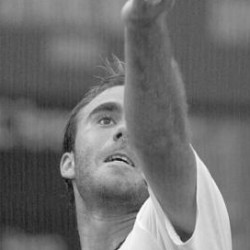

('empty face – ', '/Luis_Horna/Luis_Horna_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luis_Horna/Luis_Horna_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luis_Horna/Luis_Horna_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Daschle/Tom_Daschle_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Daschle/Tom_Daschle_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Daschle/Tom_Daschle_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Daschle/Tom_Daschle_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Daschle/Tom_Daschle_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Daschle/Tom_Daschle_0003.jpg
/Users/justynaowczarek/Development/stud

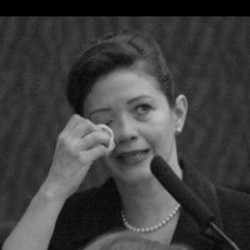

('empty face – ', '/Clara_Harris/Clara_Harris_0005.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Clara_Harris/Clara_Harris_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0022.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0023.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0035.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alvaro_Uribe/Alvaro_Uribe_0020.jpg
/Users/justynao

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Angelina_Jolie/Angelina_Jolie_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Angelina_Jolie/Angelina_Jolie_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Angelina_Jolie/Angelina_Jolie_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Angelina_Jolie/Angelina_Jolie_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Angelina_Jolie/Angelina_Jolie_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Angelina_Jolie/Angelina_Jolie_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Juanes/Juanes_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Juanes/Juanes_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

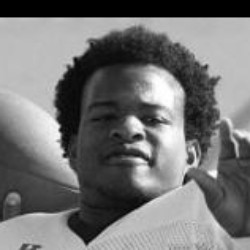

('empty face – ', '/Damarius_Bilbo/Damarius_Bilbo_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steny_Hoyer/Steny_Hoyer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luciano_Pavarotti/Luciano_Pavarotti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luciano_Pavarotti/Luciano_Pavarotti_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luciano_Pavarotti/Luciano_Pavarotti_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jason_Petty/Jason_Petty_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brian_Pavlich/Brian_Pavlich_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ismail_Cem/Ismail_Cem_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Claudia_Talancon/A

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cesar_Gaviria/Cesar_Gaviria_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cesar_Gaviria/Cesar_Gaviria_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cesar_Gaviria/Cesar_Gaviria_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cesar_Gaviria/Cesar_Gaviria_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Kostelnik/Michael_Kostelnik_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Kostelnik/Michael_Kostelnik_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Romain_Duris/Romain_Duris_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammad_Khatami/Mohammad_Khatami_0002.jpg
/Users/justynaowczarek/Development/s

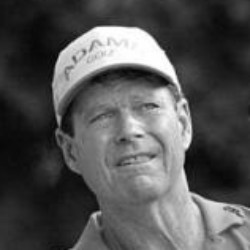

('empty face – ', '/Tom_Watson/Tom_Watson_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Watson/Tom_Watson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Klestil/Thomas_Klestil_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Caio_Blat/Caio_Blat_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Ferguson/Bob_Ferguson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Randy_Jackson/Randy_Jackson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eunice_Barber/Eunice_Barber_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eunice_Barber/Eunice_Barber_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ozzy_Osbourne/Ozzy_Osbourne_0001.jpg
/Users/justynaowc

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Santorum/Rick_Santorum_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Javier_Bardem/Javier_Bardem_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luis_Rosario_Huertas/Luis_Rosario_Huertas_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sandra_Milo/Sandra_Milo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julius_Barnes/Julius_Barnes_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Taha_Yassin_Ramadan/Taha_Yassin_Ramadan_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Taha_Yassin_Ramadan/Taha_Yassin_Ramadan_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Taha_Yassin_Ramadan/Taha_Yassin_Ramadan_0011.jpg
/Users/jus

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Hogan/Mark_Hogan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ferenc_Madl/Ferenc_Madl_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ferenc_Madl/Ferenc_Madl_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jake_Brace/Jake_Brace_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gavyn_Davies/Gavyn_Davies_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Janine_Pietsch/Janine_Pietsch_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dagmar_Dunlevy/Dagmar_Dunlevy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Zico/Zico_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Zico/Zico_0

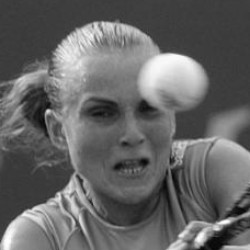

('empty face – ', '/Tatiana_Panova/Tatiana_Panova_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Spalding/James_Spalding_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Asif_Hanif/Asif_Hanif_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Ellison/Larry_Ellison_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Ellison/Larry_Ellison_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Ellison/Larry_Ellison_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marc-Andre_Fleury/Marc-Andre_Fleury_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marc-Andre_Fleury/Marc-Andre_Fleury_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andrew_Weissmann/And

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vanessa_Redgrave/Vanessa_Redgrave_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vanessa_Redgrave/Vanessa_Redgrave_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Johanns/Mike_Johanns_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Salter/Mark_Salter_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jimmy_Carter/Jimmy_Carter_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jimmy_Carter/Jimmy_Carter_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jimmy_Carter/Jimmy_Carter_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jimmy_Carter/Jimmy_Carter_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sy

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barbara_Walters/Barbara_Walters_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barbara_Walters/Barbara_Walters_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barbara_Walters/Barbara_Walters_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barbara_Walters/Barbara_Walters_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/William_Murabito/William_Murabito_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ozzie_Smith/Ozzie_Smith_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matt_Braker/Matt_Braker_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steven_Seagal/Steven_Seagal_0002.jpg
/Users/justynaowczarek/Development/studia/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barbara_Brezigar/Barbara_Brezigar_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Fico/Robert_Fico_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Fico/Robert_Fico_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Wariner/Steve_Wariner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emily_Mortimer/Emily_Mortimer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Don_Boudria/Don_Boudria_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Diane_Ladd/Diane_Ladd_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Piotr_Anderszewski/Piotr_Anderszewski_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

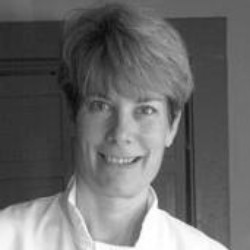

('empty face – ', '/Elisabeth_Schumacher/Elisabeth_Schumacher_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sanjay_Chawla/Sanjay_Chawla_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Douglas_Faneuil/Douglas_Faneuil_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Picabo_Street/Picabo_Street_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dan_LaCoutre/Dan_LaCoutre_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Madikians/Andy_Madikians_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Namuddu_Florence/Namuddu_Florence_0001.jpg


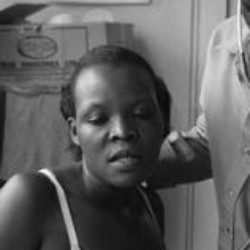

('empty face – ', '/Namuddu_Florence/Namuddu_Florence_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nathalie_Dechy/Nathalie_Dechy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chen_Tsai-chin/Chen_Tsai-chin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pascal_Lamy/Pascal_Lamy_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pascal_Lamy/Pascal_Lamy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leni_Bjorklund/Leni_Bjorklund_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Herbert_Haupt/Herbert_Haupt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anna_Chicherova/Anna_Chicherova_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bernadette_Peters/Bernadet

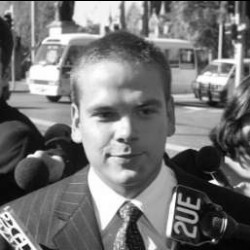

('empty face – ', '/Lachlan_Murdoch/Lachlan_Murdoch_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nora_Ephron/Nora_Ephron_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jamie_Carey/Jamie_Carey_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Catania/Antonio_Catania_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Francois_Botha/Francois_Botha_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Freudenberg/Jim_Freudenberg_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammad_Mustapha_Miro/Mohammad_Mustapha_Miro_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marcelo_Bielsa/Marcelo_Bielsa_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Miguel_A

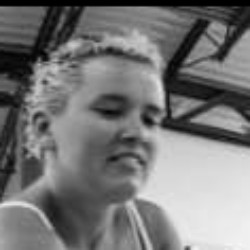

('empty face – ', '/Teri_Files/Teri_Files_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andrew_Shutley/Andrew_Shutley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ted_Nolan/Ted_Nolan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nikki_McKibbin/Nikki_McKibbin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Debbie_Reynolds/Debbie_Reynolds_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Debbie_Reynolds/Debbie_Reynolds_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Debbie_Reynolds/Debbie_Reynolds_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Debbie_Reynolds/Debbie_Reynolds_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Billy_Graham/Billy_Graham_00

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_OBrien/Thomas_OBrien_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_OBrien/Thomas_OBrien_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_OBrien/Thomas_OBrien_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Martz/Mike_Martz_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Martz/Mike_Martz_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Martz/Mike_Martz_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Martz/Mike_Martz_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Martz/Mike_Martz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Katja_Riemann/Katja_Riemann_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marcus_Gronholm/Marcus_Gronholm_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marcus_Gronholm/Marcus_Gronholm_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jamir_Miller/Jamir_Miller_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Milo_Maestrecampo/Milo_Maestrecampo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Milo_Maestrecampo/Milo_Maestrecampo_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Milo_Maestrecampo/Milo_Maestrecampo_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tanya_Lindenmuth/Tanya_Lindenmuth_0001.jpg
/Users/justynaowczar

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Marinho/Roberto_Marinho_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Marinho/Roberto_Marinho_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Marinho/Roberto_Marinho_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jerry_Colangelo/Jerry_Colangelo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_McCartney/Paul_McCartney_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_McCartney/Paul_McCartney_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_McCartney/Paul_McCartney_0003.jpg
/Users/justynaowczarek/Development

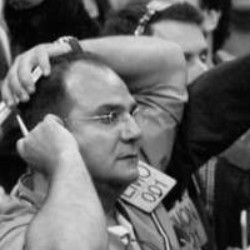

('empty face – ', '/Ed_Mekertichian/Ed_Mekertichian_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Allen/George_Allen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lennart_Johansson/Lennart_Johansson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eliott_Spitzer/Eliott_Spitzer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Todd_Reid/Todd_Reid_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Josh_Childress/Josh_Childress_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pat_Cox/Pat_Cox_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pat_Cox/Pat_Cox_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Giulietta_Masina/Giulietta_Masina_0001.jpg
/Users/ju

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gene_Robinson/Gene_Robinson_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rodrigo_Borja/Rodrigo_Borja_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rodrigo_Borja/Rodrigo_Borja_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Lawrence/John_Lawrence_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Teresa_Worbis/Teresa_Worbis_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joel_Todd/Joel_Todd_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Erick_Barkley/Erick_Barkley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kyle_Shewfelt/Kyle_Shewfelt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów

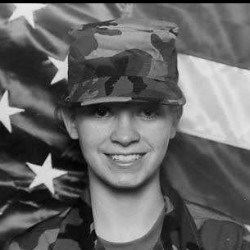

('empty face – ', '/Jessica_Lynch/Jessica_Lynch_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jessica_Lynch/Jessica_Lynch_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Quincy_Jones/Quincy_Jones_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mile_Mrksic/Mile_Mrksic_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Haslett/Jim_Haslett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lana_Clarkson/Lana_Clarkson_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lana_Clarkson/Lana_Clarkson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Rosado/Jose_Rosado_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Papandreou/George_Papandreou_0004.jpg
/Us

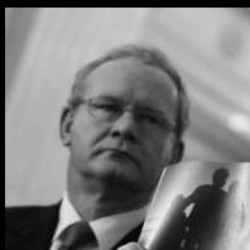

('empty face – ', '/Martin_McGuinness/Martin_McGuinness_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_McGuinness/Martin_McGuinness_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_McGuinness/Martin_McGuinness_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tonino_Guerra/Tonino_Guerra_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Patrick_Dennehy/Patrick_Dennehy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tatyana_Tomashova/Tatyana_Tomashova_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Graeme_Lloyd/Graeme_Lloyd_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Adam_Freier/Adam_Freier_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kris

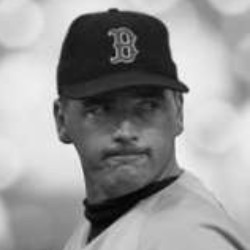

('empty face – ', '/John_Burkett/John_Burkett_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Giancarlo_Fisichella/Giancarlo_Fisichella_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison_Ford_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison_Ford_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison_Ford_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison_Ford_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison_Ford_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison_Ford_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harrison_Ford/Harrison

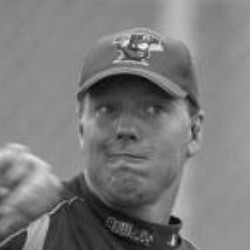

('empty face – ', '/Roy_Halladay/Roy_Halladay_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Moshe_Katsav/Moshe_Katsav_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Moshe_Katsav/Moshe_Katsav_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Moshe_Katsav/Moshe_Katsav_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Moshe_Katsav/Moshe_Katsav_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Edith_Masai/Edith_Masai_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mercedes_Amor/Mercedes_Amor_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Claudette_Robinson/Claudette_Robinson_0001.jpg


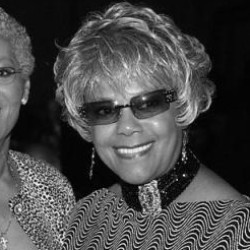

('empty face – ', '/Claudette_Robinson/Claudette_Robinson_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Robert_Rudolph/Eric_Robert_Rudolph_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Robert_Rudolph/Eric_Robert_Rudolph_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Robert_Rudolph/Eric_Robert_Rudolph_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Butts/James_Butts_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Butts/James_Butts_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Shanley/Paul_Shanley_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Shanley/Paul_Shanley_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nina_Jacobson/Nina_Jacobson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chung_Mong-hun/Chung_Mong-hun_0001.jpg


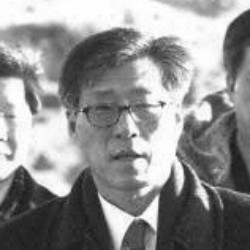

('empty face – ', '/Chung_Mong-hun/Chung_Mong-hun_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chung_Mong-hun/Chung_Mong-hun_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Terry_Bradshaw/Terry_Bradshaw_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Donovan/Michael_Donovan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brett_Hull/Brett_Hull_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dan_Bartlett/Dan_Bartlett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Tovar/Roberto_Tovar_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Coppola/Roman_Coppola_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricky_Ponting/Ricky_Ponting_0001

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anna_Kournikova/Anna_Kournikova_0005.jpg


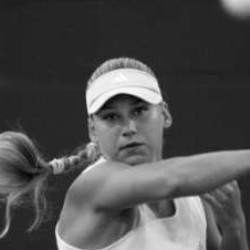

('empty face – ', '/Anna_Kournikova/Anna_Kournikova_0005.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anna_Kournikova/Anna_Kournikova_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wolfgang_Becker/Wolfgang_Becker_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nate_Huffman/Nate_Huffman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Schrader/Paul_Schrader_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Nalbandian/David_Nalbandian_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Nalbandian/David_Nalbandian_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Nalbandian/David_Nalbandian_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Yogi_Berra/Yogi_Berra_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Horan/Robert_Horan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Horan/Robert_Horan_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Pausini/Laura_Pausini_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jay_Garner/Jay_Garner_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jay_Garner/Jay_Garner_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jay_Garner/Jay_Garner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jay_Garner/Jay_Garner_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jay_Garne

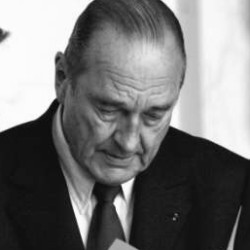

('empty face – ', '/Jacques_Chirac/Jacques_Chirac_0029.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jac

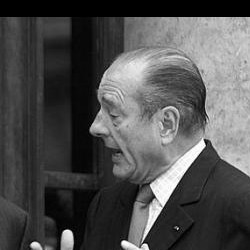

('empty face – ', '/Jacques_Chirac/Jacques_Chirac_0006.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0038.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0010.jpg


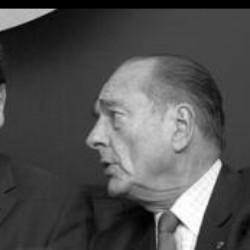

('empty face – ', '/Jacques_Chirac/Jacques_Chirac_0010.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0039.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0049.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacques_Chirac/Jacques_Chirac_0048.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/tom_hardy/tom_hardy.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/tom_hardy/tom_hardy2.jpg
/Users/j

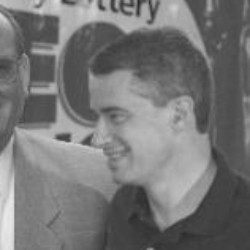

('empty face – ', '/James_McGreevey/James_McGreevey_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_McGreevey/James_McGreevey_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_McGreevey/James_McGreevey_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Al-Douri/Mohammed_Al-Douri_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Al-Douri/Mohammed_Al-Douri_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Al-Douri/Mohammed_Al-Douri_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Al-Douri/Mohammed_Al-Douri_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Al-Douri/Mohammed_Al-Douri_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałó

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lubomir_Zaoralek/Lubomir_Zaoralek_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ahmed_Ahmed/Ahmed_Ahmed_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kristin_Scott/Kristin_Scott_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shamai_Leibowitz/Shamai_Leibowitz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ted_Washington/Ted_Washington_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Yoon_Won-Sik/Yoon_Won-Sik_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lonnie_Donegan/Lonnie_Donegan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Bronstein/Naomi_Bronstein_0001.jpg
/Users/justynaowczarek/Development/studia/

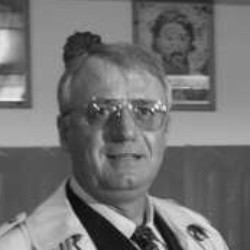

('empty face – ', '/Vojislav_Seselj/Vojislav_Seselj_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Earl_Fritts/Earl_Fritts_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeffrey_Donaldson/Jeffrey_Donaldson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rina_Lazo/Rina_Lazo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Herb_Sendek/Herb_Sendek_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Herb_Sendek/Herb_Sendek_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Herb_Sendek/Herb_Sendek_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Herb_Sendek/Herb_Sendek_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kenneth_Evans/Kenneth_Evans_0001.jpg
/Users/justyn

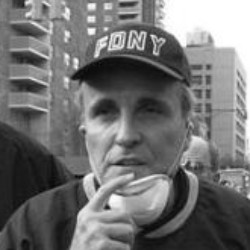

('empty face – ', '/Rudolph_Giuliani/Rudolph_Giuliani_0012.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolph_Giuliani/Rudolph_Giuliani_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolph_Giuliani/Rudolph_Giuliani_0007.jpg


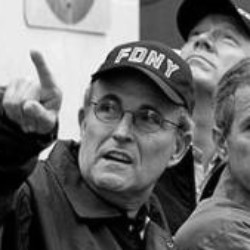

('empty face – ', '/Rudolph_Giuliani/Rudolph_Giuliani_0007.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolph_Giuliani/Rudolph_Giuliani_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolph_Giuliani/Rudolph_Giuliani_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolph_Giuliani/Rudolph_Giuliani_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolph_Giuliani/Rudolph_Giuliani_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emily_Mason/Emily_Mason_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alex_Cejka/Alex_Cejka_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Blythe_Danner/Blythe_Danner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Blythe_Danner/

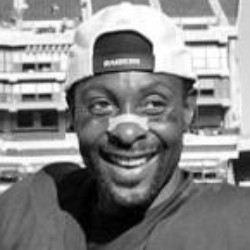

('empty face – ', '/Jerry_Rice/Jerry_Rice_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Karen_Sharpe_Kramer/Karen_Sharpe_Kramer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jorge_Arce/Jorge_Arce_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jorge_Arce/Jorge_Arce_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesse_Harris/Jesse_Harris_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesse_Harris/Jesse_Harris_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesse_Harris/Jesse_Harris_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Davey_Johnson/Davey_Johnson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eloy_Gutierrez/Eloy_Gutierrez_0001.jpg
/Users/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0031.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerhard_Schroeder/Gerhard_Schroeder_0

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricky_Cottrill/Ricky_Cottrill_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Richard_Perle/Richard_Perle_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sidney_Poitier/Sidney_Poitier_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Diane_Lane/Diane_Lane_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Zeng_Qinghong/Zeng_Qinghong_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Andrew/Mark_Andrew_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Gyanendra/King_Gyanendra_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Johnnie_Lynn/Johnnie_Lynn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnał

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Azra_Akin/Azra_Akin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Azra_Akin/Azra_Akin_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/William_Overlin/William_Overlin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luke_Ridnour/Luke_Ridnour_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shingo_Katayama/Shingo_Katayama_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thierry_Mariani/Thierry_Mariani_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Frank_Zappa/Frank_Zappa_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christian_Malcolm/Christian_Malcolm_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sy

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Maria_Aznar/Jose_Maria_Aznar_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_Landau/Martin_Landau_0001.jpg
/Users/justyna

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0020.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0022.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hamid_Karzai/Hamid_Karzai_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0029.jpg


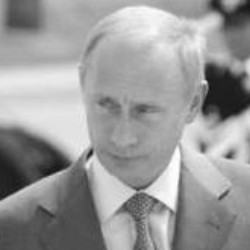

('empty face – ', '/Vladimir_Putin/Vladimir_Putin_0029.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0038.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vladimir_Putin_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vladimir_Putin/Vla

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julie_Gerberding/Julie_Gerberding_0013.jpg
/Users/j

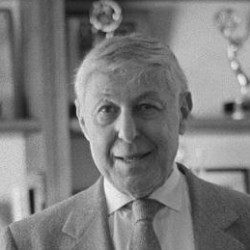

('empty face – ', '/Don_Hewitt/Don_Hewitt_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0029.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0121.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0135.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0069.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0055.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0041.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0096.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0082.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0094.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tony_Blair/Tony_Blair_0

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dion_Glover/Dion_Glover_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Taino/Eric_Taino_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Scott_Morris/David_Scott_Morris_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Scott_Weiland/Scott_Weiland_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gorden_Tallis/Gorden_Tallis_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Erika_Reyes/Erika_Reyes_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christian_Longo/Christian_Longo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christian_Longo/Christian_Longo_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarza

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Deutsch/Michael_Deutsch_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ernie_Eves/Ernie_Eves_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ernie_Eves/Ernie_Eves_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Asif_Ali_Zardari/Asif_Ali_Zardari_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bozzo/Laura_Bozzo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norodom_Sihanouk/Norodom_Sihanouk_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norodom_Sihanouk/Norodom_Sihanouk_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norodom_Sihanouk/Norodom_Sihanouk_0003.jpg
/Users/justynaowczarek/Development/studia/pr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Catherine_Deneuve/Catherine_Deneuve_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Catherine_Deneuve/Catherine_Deneuve_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Catherine_Deneuve/Catherine_Deneuve_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Catherine_Deneuve/Catherine_Deneuve_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Catherine_Deneuve/Catherine_Deneuve_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Lobinger/Tim_Lobinger_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carlos_Arroyo/Carlos_Arroyo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Muammar_Gaddafi/Muammar_Gaddafi_0001.jpg


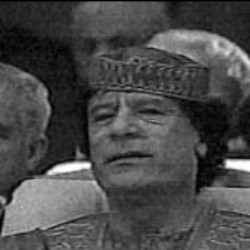

('empty face – ', '/Muammar_Gaddafi/Muammar_Gaddafi_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Muammar_Gaddafi/Muammar_Gaddafi_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Urmila_Matondkar/Urmila_Matondkar_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Straw/Jack_Straw_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Straw/Jack_Straw_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Straw/Jack_Straw_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Straw/Jack_Straw_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Straw/Jack_Straw_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Straw/Jack_Straw_0001.jpg
/Users/justynaowcza

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tang_Jiaxuan/Tang_Jiaxuan_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tang_Jiaxuan/Tang_Jiaxuan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elizabeth_Taylor/Elizabeth_Taylor_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elizabeth_Taylor/Elizabeth_Taylor_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Greenwood/Jim_Greenwood_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Lopez-Alegria/Michael_Lopez-Alegria_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andrea_Kiser/Andrea_Kiser_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eddie_Lewis/Eddie_Lewis_0001.jpg
/Users/justynaowczarek/Development/stu

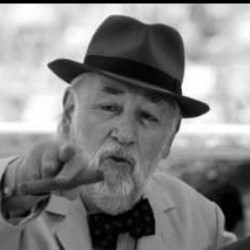

('empty face – ', '/Philippe_Noiret/Philippe_Noiret_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Guaterroma/Roberto_Guaterroma_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Eder/John_Eder_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Floyd_Keith/Floyd_Keith_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dai_Chul_Chyung/Dai_Chul_Chyung_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Jackson/Alan_Jackson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Calista_Flockhart/Calista_Flockhart_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Calista_Flockhart/Calista_Flockhart_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Calista_Flockh

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0020.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amelie_Mauresmo/Amelie_Mauresmo_0021.jpg
/Users/justynaowczarek/D

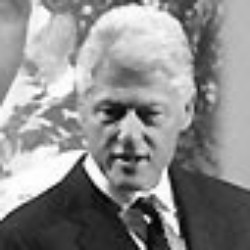

('empty face – ', '/Bill_Clinton/Bill_Clinton_0022.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0023.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0020.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Clinton/Bill_Clinton_0010.jpg
/Users/justynao

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tina_Fey/Tina_Fey_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dianne_Feinstein/Dianne_Feinstein_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dianne_Feinstein/Dianne_Feinstein_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dianne_Feinstein/Dianne_Feinstein_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/William_Hyde/William_Hyde_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mary_McCarty/Mary_McCarty_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ed_Smart/Ed_Smart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ed_Smart/Ed_Smart_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ed_Smart/Ed_Smart_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brian_Kerr/Brian_Kerr_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gordana_Grubin/Gordana_Grubin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Reilly/John_Reilly_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Reilly/John_Reilly_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Amstutz/Tom_Amstutz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nigel_Redden/Nigel_Re

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gary_Paer/Gary_Paer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Santiago_Botero/Santiago_Botero_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christopher_Russell/Christopher_Russell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rebecca_Romijn-Stamos/Rebecca_Romijn-Stamos_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rebecca_Romijn-Stamos/Rebecca_Romijn-Stamos_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rebecca_Romijn-Stamos/Rebecca_Romijn-Stamos_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rebecca_Romijn-Stamos/Rebecca_Romijn-Stamos_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Heyman/David_He

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0029.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nestor_Kirchner/Nestor_Kirchner_0004.jpg
/Users/justynaowczarek/D

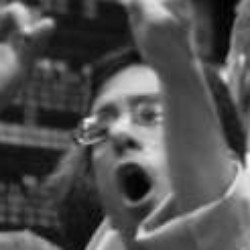

('empty face – ', '/Jeff_Feldman/Jeff_Feldman_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chris_Klein/Chris_Klein_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jan-Michael_Gambill/Jan-Michael_Gambill_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jan-Michael_Gambill/Jan-Michael_Gambill_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jan-Michael_Gambill/Jan-Michael_Gambill_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Becker/Boris_Becker_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Becker/Boris_Becker_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Becker/Boris_Becker_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Beck

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ana_Guevara/Ana_Guevara_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Benjamin_Bratt/Benjamin_Bratt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/L

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Constance_Marie/Constance_Marie_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Constance_Marie/Constance_Marie_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Constance_Marie/Constance_Marie_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stephan_Eberharter/Stephan_Eberharter_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Bradley/Bill_Bradley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Regina_Ip/Regina_Ip_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Miles_Stewart/Miles_Stewart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Geoffrey_Rush/Geoffrey_Rush_0001.jpg
/Users/justynaowczarek/Development/studia/pr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hunter_Kemper/Hunter_Kemper_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andrei_Nikolishin/Andrei_Nikolishin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leon_LaPorte/Leon_LaPorte_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leon_LaPorte/Leon_LaPorte_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashanti/Ashanti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashanti/Ashanti_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashanti/Ashanti_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashanti/Ashanti_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashanti/Ashanti_000

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Watts/Naomi_Watts_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_W

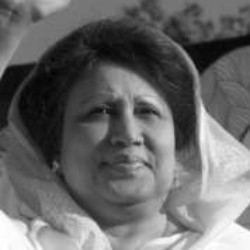

('empty face – ', '/Begum_Khaleda_Zia/Begum_Khaleda_Zia_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Begum_Khaleda_Zia/Begum_Khaleda_Zia_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Daryl_Sabara/Daryl_Sabara_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Largent/Steve_Largent_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Self/Bill_Self_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Terry_Hoeppner/Terry_Hoeppner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Bennett/Dick_Bennett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Phil_Cline/Phil_Cline_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mary_Sue_Coleman/Mary_Sue_Coleman_

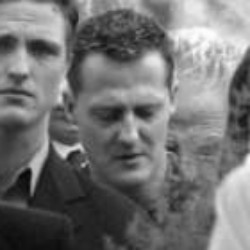

('empty face – ', '/Michael_Schumacher/Michael_Schumacher_0015.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Schumacher/Michael_Schumacher_0007.jpg
/Users/justynaowczarek/Development/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chea_Sophara/Chea_Sophara_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Fargo/Thomas_Fargo_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Fargo/Thomas_Fargo_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Fargo/Thomas_Fargo_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Fargo/Thomas_Fargo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Willis_Roberts/Willis_Roberts_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ilan_Ramon/Ilan_Ramon_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ilan_Ramon/Ilan_Ramon_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/i

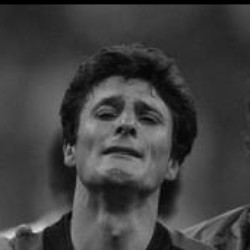

('empty face – ', '/Javier_Zanetti/Javier_Zanetti_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kenneth_Carlsen/Kenneth_Carlsen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Gascoigne/Paul_Gascoigne_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Gascoigne/Paul_Gascoigne_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Gascoigne/Paul_Gascoigne_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lyle_Lovett/Lyle_Lovett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Irina_Lobacheva/Irina_Lobacheva_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Peter_Fitzgerald/Peter_Fitzgerald_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kurt_Hellstrom/K

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Dole/Bob_Dole_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mikhail_Khodorkovsky/Mikhail_Khodorkovsky_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Will_Self/Will_Self_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Sutton/Hal_Sutton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Sutton/Hal_Sutton_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Lembo/Alejandro_Lembo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christina_Aguilera/Christina_Aguilera_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christina_Aguilera/Christina_Aguilera_0002.jpg
/Users/justynaowczarek/Development/studia/przetw

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ali_Naimi/Ali_Naimi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ali_Naimi/Ali_Naimi_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ali_Naimi/Ali_Naimi_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Naruhito/Prince_Naruhito_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Naruhito/Prince_Naruhito_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Naruhito/Prince_Naruhito_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Lockhart/James_Lockhart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amy_Redford/Amy_Redford_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0031.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0027.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0032.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0026.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kofi_Annan/Kofi_Annan_0

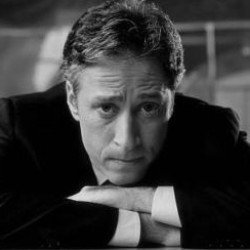

('empty face – ', '/Jon_Stewart/Jon_Stewart_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohamed_Seineldin/Mohamed_Seineldin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chip_Burrus/Chip_Burrus_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hana_Urushima/Hana_Urushima_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mukesh_Ambani/Mukesh_Ambani_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mukesh_Ambani/Mukesh_Ambani_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mukesh_Ambani/Mukesh_Ambani_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antwun_Echols/Antwun_Echols_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fabrice_Santoro/Fabrice_Santoro_00

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matt_Dillon/Matt_Dillon_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matt_Dillon/Matt_Dillon_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matt_Dillon/Matt_Dillon_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vicente_F

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Clijsters/Kim_Clijsters_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christopher_Patten/Christopher_Patten_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Bland/Rick_Bland_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Duncan_Fletcher/Duncan_Fletcher_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ciaran_Hinds/Ciaran_Hinds_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Ashraf_Hafiz/Mohammed_Ashraf_Hafiz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bijan_Darvish/Bijan_Darvish_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bijan_Darvish/Bijan_Darvish_0002.jpg
/Users/justynaowczarek/Devel

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paulo_Cesar_Pinheiro/Paulo_Cesar_Pinheiro_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paulo_Cesar_Pinheiro/Paulo_Cesar_Pinheiro_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_OReilly/Bill_OReilly_0001.jpg


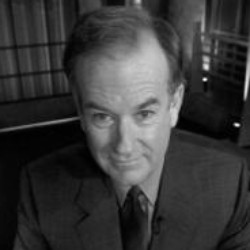

('empty face – ', '/Bill_OReilly/Bill_OReilly_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Juergen_Schrempp/Juergen_Schrempp_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Franco/John_Franco_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Kelly/Tom_Kelly_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alex_Wallau/Alex_Wallau_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hideki_Sato/Hideki_Sato_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robbie_Fowler/Robbie_Fowler_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robbie_Fowler/Robbie_Fowler_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Beecher_Ray_Kirby/Beecher_Ray_Kirby_0001.jpg
/User

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eileen_Coparropa/Eileen_Coparropa_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eileen_Coparropa/Eileen_Coparropa_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Schumer/Charles_Schumer_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Schumer/Charles_Schumer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Huff/Fred_Huff_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mario_Gallegos/Mario_Gallegos_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guido_Westerwelle/Guido_Westerwelle_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guido_Westerwelle/Guido_Westerwelle_0002.jpg
/Users/justynaowczarek/Dev

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brad_Garrett/Brad_Garrett_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eduardo_Romero/Eduardo_Romero_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kurt_Russell/Kurt_Russell_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kurt_Russell/Kurt_Russell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eve_Ensler/Eve_Ensler_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andy_Griffith/Andy_Griffith_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ralph_Nader/Ralph_Nader_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carlos_Menem/Carlos_Menem_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sergei_Yastrzhembsky/Sergei_Yastrzhembsky_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Ballmer/Steve_Ballmer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Ballmer/Steve_Ballmer_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Ballmer/Steve_Ballmer_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chistian_Stahl/Chistian_Stahl_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Camille_Colvin/Camille_Colvin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Judith_Nathan/Judith_Nathan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anthony_Carter/Anthony_Carter_0001.jpg
/Users/justynaowczarek/Development/s

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeffrey_Jones/Jeffrey_Jones_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nancy_Kerrigan/Nancy_Kerrigan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Iveta_Benesova/Iveta_Benesova_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Wellstone/Paul_Wellstone_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Wellstone/Paul_Wellstone_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Wellstone/Paul_Wellstone_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mahdi_Al_Bassam/Mahdi_Al_Bassam_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marcella_Anderson/Marcella_Anderson_0001.jpg
/Users/justynaowczarek/Development

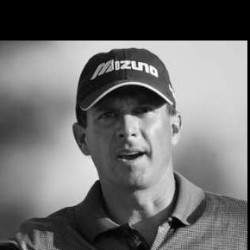

('empty face – ', '/Billy_Andrade/Billy_Andrade_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Noah_Wyle/Noah_Wyle_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Noah_Wyle/Noah_Wyle_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Noah_Wyle/Noah_Wyle_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dariusz_Michalczewski/Dariusz_Michalczewski_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Max_von_Sydow/Max_von_Sydow_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Erin_Hershey_Presley/Erin_Hershey_Presley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prem_Kumar_Nair/Prem_Kumar_Nair_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Menendez/Bob_Menende

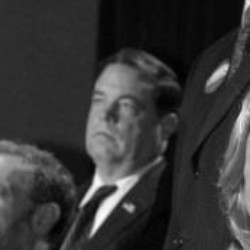

('empty face – ', '/Thomas_Birmingham/Thomas_Birmingham_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Takeo_Fukui/Takeo_Fukui_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barrett_Jackman/Barrett_Jackman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barrett_Jackman/Barrett_Jackman_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jacob_Frenkel/Jacob_Frenkel_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Benicio_Del_Toro/Benicio_Del_Toro_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barry_Hinson/Barry_Hinson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Todd_Wike/Todd_Wike_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kate_Richardson/Kate_Richa

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Blake/Robert_Blake_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Blake/Robert_Blake_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Blake/Robert_Blake_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Blake/Robert_Blake_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Blake/Robert_Blake_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Blake/Robert_Blake_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdullah_Nasseef/Abdullah_Nasseef_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carol_Carmody/Carol_Carmody_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnał

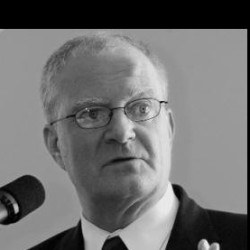

('empty face – ', '/John_Marburger/John_Marburger_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Romeo_Gigli/Romeo_Gigli_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Pfleger/Michael_Pfleger_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tamara_Brooks/Tamara_Brooks_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tamara_Brooks/Tamara_Brooks_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jane_Krakowski/Jane_Krakowski_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brandon_Jones/Brandon_Jones_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Koenigs/Tom_Koenigs_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stephen_Swindal/Stephen_Swindal_00

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Petria_Thomas/Petria_Thomas_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gordon_Cooper/Gordon_Cooper_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kelli_White/Kelli_White_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kelli_White/Kelli_White_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bonnie_Hunt/Bonnie_Hunt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Annie-Jeanne_Reynaud/Annie-Jeanne_Reynaud_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Odilia_Collazo/Odilia_Collazo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Maryn_McKenna/Maryn_McKenna_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarza

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierce_Brosnan/Pierce_Brosnan_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierce_Brosnan/Pierce_Brosnan_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierce_Brosnan/Pierce_Brosnan_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierce_Brosnan/Pierce_Brosnan_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stanley_Tong/Stanley_Tong_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stanley_Tong/Stanley_Tong_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugh_Campbell/Hugh_Campbell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pharrell_Williams/Pharrell_Williams_0001.jpg
/Users/justynaowczarek/Development/studia/pr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barzan_al-Tikriti/Barzan_al-Tikriti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ron_Kirk/Ron_Kirk_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oscar_De_La_Hoya/Oscar_De_La_Hoya_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oscar_De_La_Hoya/Oscar_De_La_Hoya_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oscar_De_La_Hoya/Oscar_De_La_Hoya_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oscar_De_La_Hoya/Oscar_De_La_Hoya_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oscar_De_La_Hoya/Oscar_De_La_Hoya_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oscar_De_La_Hoya/Oscar_De_La_Hoya_0006.jpg
/Users/justynaowczarek

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Al_Hindi/Mohammed_Al_Hindi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Baumgartner/Christine_Baumgartner_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Baumgartner/Christine_Baumgartner_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Baumgartner/Christine_Baumgartner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Baumgartner/Christine_Baumgartner_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Baumgartner/Christine_Baumgartner_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wu_Yi/Wu_Yi_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wu_Yi/Wu_Yi_0003.jpg


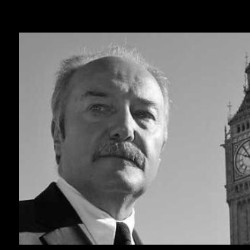

('empty face – ', '/George_Galloway/George_Galloway_0004.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Galloway/George_Galloway_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Galloway/George_Galloway_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Galloway/George_Galloway_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Arron/Christine_Arron_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kong_Quan/Kong_Quan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chris_Crocker/Chris_Crocker_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aleksander_Kwasniewski/Aleksander_Kwasniewski_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alek

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Erika_Christensen/Erika_Christensen_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Danny_Elfman/Danny_Elfman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rita_Grande/Rita_Grande_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rita_Grande/Rita_Grande_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rita_Grande/Rita_Grande_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gary_Winnick/Gary_Winnick_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gary_Winnick/Gary_Winnick_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laurel_Clark/Laurel_Clark_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i o

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kitin_Munoz/Kitin_Munoz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susan_Sarandon/Susan_Sarandon_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susan_Sarandon/Susan_Sarandon_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susan_Sarandon/Susan_Sarandon_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susan_Sarandon/Susan_Sarandon_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susan_Sarandon/Susan_Sarandon_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susan_Sarandon/Susan_Sarandon_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nadine_Vinzens/Nadine_Vinzens_0001.jpg
/Users/justynaowczarek/Development/studia/prze

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Alpay/David_Alpay_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rodney_Dangerfield/Rodney_Dangerfield_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitchell_Daniels/Mitchell_Daniels_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitchell_Daniels/Mitchell_Daniels_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitchell_Daniels/Mitchell_Daniels_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitchell_Daniels/Mitchell_Daniels_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Paul_DeJoria/John_Paul_DeJoria_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Mehdi_Saleh/Mohammed_Mehdi_Saleh_0001.jpg
/Use

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jean_Chretien/Jean_Chretien_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jean_Chretien/Jean_Chretien_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jean_Chretien/Jean_Chretien_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carly_Gullickson/Carly_Gullickson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ron_Lantz/Ron_Lantz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Morvillo/Robert_Morvillo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amy_Pascal/Amy_Pascal_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitchell_McLaughlin/Mitchell_McLaughlin_0001.jpg
/Users/justynaowczarek/Development/studia/przetw

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hu_Jintao/Hu_Jintao_0015.jpg
/Users/jus

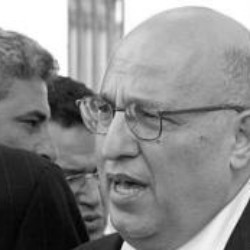

('empty face – ', '/Nabil_Shaath/Nabil_Shaath_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nabil_Shaath/Nabil_Shaath_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Rolinee/Michael_Rolinee_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leon_Lai/Leon_Lai_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Malik_Mahmud/Malik_Mahmud_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matt_Anderson/Matt_Anderson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Greg_Kinsey/Greg_Kinsey_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Oswald_Gruebel/Oswald_Gruebel_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Welch/David_Welch_0001.jpg
/Users/justynao

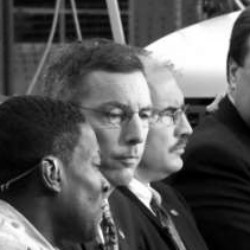

('empty face – ', '/Gary_Bald/Gary_Bald_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roger_Etchegaray/Roger_Etchegaray_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Engler/John_Engler_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bobby_Jackson/Bobby_Jackson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Stansbury/Rick_Stansbury_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Stansbury/Rick_Stansbury_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Stansbury/Rick_Stansbury_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Tanenbaum/Larry_Tanenbaum_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Andre_Agassi/Andre_Agassi_0014

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_McCauley/Martin_McCauley_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_McCauley/Martin_McCauley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chris_Swecker/Chris_Swecker_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cindy_Crawford/Cindy_Crawford_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cindy_Crawford/Cindy_Crawford_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cindy_Crawford/Cindy_Crawford_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luis_Pujols/Luis_Pujols_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Heather_Chinnock/Heather_Chinnock_0001.jpg
/Users/justynaowczarek/Development/studi

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Snow/John_Snow_0004.jpg
/Users/jus

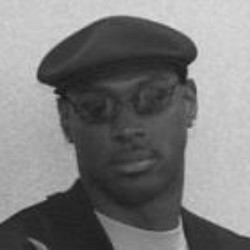

('empty face – ', '/Derrick_Rodgers/Derrick_Rodgers_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Miroljub/Miroljub_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Miroljub/Miroljub_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Parris_Glendening/Parris_Glendening_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Parris_Glendening/Parris_Glendening_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kimberly_Bruckner/Kimberly_Bruckner_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Piper/Jim_Piper_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Feliciano_Lopez/Feliciano_Lopez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Sweeney/Mike_Sweeney_0001

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0063.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0077.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0088.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0049.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0061.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0075.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0115.jpg


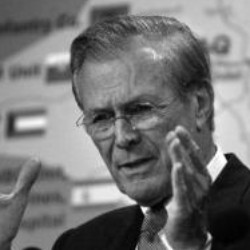

('empty face – ', '/Donald_Rumsfeld/Donald_Rumsfeld_0115.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0101.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0100.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0114.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0074.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0060.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0048.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0064.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Do

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0084.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0090.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0034.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0020.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0035.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Rumsfeld/Donald_Rumsfeld_0009.jpg
/Users/justynaowczarek/D

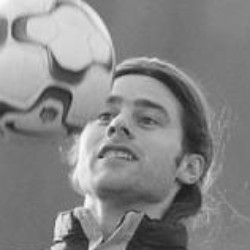

('empty face – ', '/Mauricio_Pochetino/Mauricio_Pochetino_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kobe_Bryant/Kobe_Bryant_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kobe_Bryant/Kobe_Bryant_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kobe_Bryant/Kobe_Bryant_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Plimpton/George_Plimpton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Brumley_III/George_Brumley_III_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shigeo_Nagashima/Shigeo_Nagashima_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Raghad_Saddam_Hussein/Raghad_Saddam_Hussein_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0029.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laura_Bush/Laura_Bush_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/A

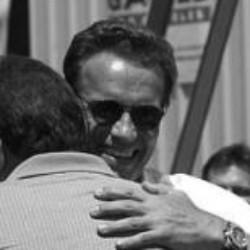

('empty face – ', '/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0029.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dale_Earnhardt/Dale_Earnhardt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Thune/John_Thune_0001.jpg


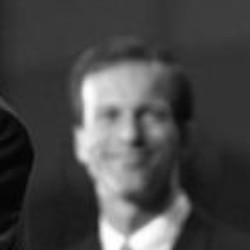

('empty face – ', '/John_Thune/John_Thune_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Calhoun/Jim_Calhoun_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lawrence_Di_Rita/Lawrence_Di_Rita_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Damon_van_Dam/Damon_van_Dam_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Damon_van_Dam/Damon_van_Dam_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_May/James_May_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Manuela_Montebrun/Manuela_Montebrun_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Derian_Hatcher/Derian_Hatcher_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_McKee/Robert_McKee_0001.jpg
/

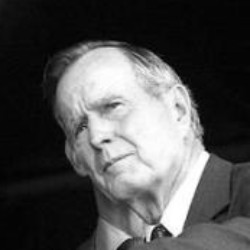

('empty face – ', '/George_HW_Bush/George_HW_Bush_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_HW_Bush/George_HW_Bush_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rudolf_Schuster/Rudolf_Schuster_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Clapton/Eric_Clapton_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Clapton/Eric_Clapton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charlize_Theron/Charlize_Theron_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Erwin_Abdullah/Erwin_Abdullah_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Pierce/Paul_Pierce_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Pierce/Paul_Pierce_0001

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mariah_Carey/Mariah_Carey_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mariah_Carey/Mariah_Carey_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mariah_Carey/Mariah_Carey_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Dodge/David_Dodge_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Dodge/David_Dodge_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Portia_de_Rossi/Portia_de_Rossi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elvis_Costello/Elvis_Costello_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Duffey/Bill_Duffey_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i o

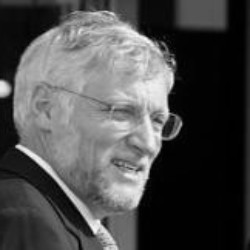

('empty face – ', '/Thor_Pedersen/Thor_Pedersen_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rob_Marshall/Rob_Marshall_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rob_Marshall/Rob_Marshall_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rob_Marshall/Rob_Marshall_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rob_Marshall/Rob_Marshall_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rob_Marshall/Rob_Marshall_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rob_Marshall/Rob_Marshall_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elijah_Wood/Elijah_Wood_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elijah_Wood/Elijah_Wood_0003.jpg
/Users/justynaowc

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Rainier_III/Prince_Rainier_III_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elizabeth_Pena/Elizabeth_Pena_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Greenspan/Alan_Greenspan_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Greenspan/Alan_Greenspan_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Greenspan/Alan_Greenspan_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Greenspan/Alan_Greenspan_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Greenspan/Alan_Greenspan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Deniz_Baykal/Deniz_Baykal_0001.jpg
/Users/justynaowczarek/Development/s

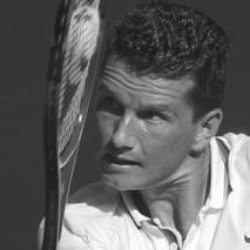

('empty face – ', '/Richard_Krajicek/Richard_Krajicek_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tyler_Hamilton/Tyler_Hamilton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tyler_Hamilton/Tyler_Hamilton_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sarah_Michelle_Gellar/Sarah_Michelle_Gellar_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sarah_Michelle_Gellar/Sarah_Michelle_Gellar_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sarah_Michelle_Gellar/Sarah_Michelle_Gellar_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Askar_Akayev/Askar_Akayev_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Daryl_Parks/Daryl_Parks_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałó

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Janet_Napolitano/Janet_Napolitano_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Stapleton/Bill_Stapleton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elizabeth_Shue/Elizabeth_Shue_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elizabeth_Shue/Elizabeth_Shue_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stephen_Oake/Stephen_Oake_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michelangelo_Antonioni/Michelangelo_Antonioni_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Barksdale/James_Barksdale_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roberto_Carlos/Roberto_Carlos_0001.jpg
/Users/justynaowczarek

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mian_Khursheed_Mehmood_Kasuri/Mian_Khursheed_Mehmood_Kasuri_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ruth_Pearce/Ruth_Pearce_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Raja_Zafar-ul-Haq/Raja_Zafar-ul-Haq_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cindy_Taylor/Cindy_Taylor_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emmy_Rossum/Emmy_Rossum_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Manuel_Gehring/Manuel_Gehring_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Humberto_Coelho/Humberto_Coelho_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Faye_Dunaway/Faye_Dunaway_0003.jpg
/Users/justynaowczarek

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laurie_Chan/Laurie_Chan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Moore/Michael_Moore_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Moore/Michael_Moore_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Moore/Michael_Moore_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sebastian_Porto/Sebastian_Porto_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Betty_Williams/Betty_Williams_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wang_Fei/Wang_Fei_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sepp_Blatter/Sepp_Blatter_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kate_Hudson/Kate_Hudson_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kevin_Millwood/Kevin_Millwood_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chandrika_Kumaratunga/Chandrika_Kumaratunga_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julia_Ormond/Julia_Ormond_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Richard_Fine/Richard_Fine_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Todd_Parrott/Todd_Parrott_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Justin_Marshall/Justin_Marshall_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sally_Field/Sally_Field_0001.jpg
/Users/justynaowczarek/Development/studia/przetw

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Banderas/Antonio_Banderas_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Banderas/Antonio_Banderas_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Antonio_Banderas/Antonio_Banderas_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wayne_Ferreira/Wayne_Ferreira_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wayne_Ferreira/Wayne_Ferreira_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wayne_Ferreira/Wayne_Ferreira_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wayne_Ferreira/Wayne_Ferreira_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wayne_Ferreira/Wayne_Ferreira_0003.jpg
/Users/justynaowczarek/Devel

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Hope/Bob_Hope_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Hope/Bob_Hope_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Hope/Bob_Hope_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Hope/Bob_Hope_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Doug_Melvin/Doug_Melvin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Doug_Melvin/Doug_Melvin_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Doug_Melvin/Doug_Melvin_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Yuri_Fedotov/Yuri_Fedotov_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Yuri_Fedotov/Yuri_Fedotov_000

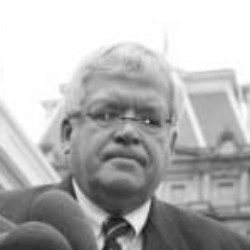

('empty face – ', '/Dennis_Hastert/Dennis_Hastert_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dennis_Hastert/Dennis_Hastert_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dennis_Hastert/Dennis_Hastert_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paris_Hilton/Paris_Hilton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paris_Hilton/Paris_Hilton_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brendan_Hansen/Brendan_Hansen_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brendan_Hansen/Brendan_Hansen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Luis_Ernesto_Derbez_Bautista/Luis_Ernesto_Derbez_Bautista_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/inpu

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rainer_Schuettler/Rainer_Schuettler_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rainer_Schuettler/Rainer_Schuettler_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Julio_Toro/Julio_Toro_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carrie-Anne_Moss/Carrie-Anne_Moss_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carrie-Anne_Moss/Carrie-Anne_Moss_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carrie-Anne_Moss/Carrie-Anne_Moss_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carrie-Anne_Moss/Carrie-Anne_Moss_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carrie-Anne_Moss/Carrie-Anne_Moss_0003.jpg
/Users/justynaow

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sara_Elisabeth_Ahmad/Sara_Elisabeth_Ahmad_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sandy_Wise/Sandy_Wise_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Denzel_Washington/Denzel_Washington_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Denzel_Washington/Denzel_Washington_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Denzel_Washington/Denzel_Washington_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Denzel_Washington/Denzel_Washington_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Denzel_Washington/Denzel_Washington_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joshua_Harapko/Joshua_Harapko_0001.jpg
/Users

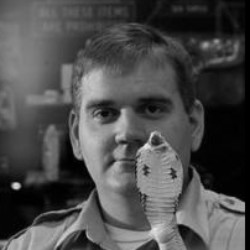

('empty face – ', '/Chris_Andrews/Chris_Andrews_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Don_King/Don_King_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joey_Mantia/Joey_Mantia_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pedro_Solbes/Pedro_Solbes_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pedro_Solbes/Pedro_Solbes_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pedro_Solbes/Pedro_Solbes_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pedro_Solbes/Pedro_Solbes_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kurt_Budke/Kurt_Budke_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christian_Fittipaldi/Christian_Fittipaldi_0001.jpg
/Users/just

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0147.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0027.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0033.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0225.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0231.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0219.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0218.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0230.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0131.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0128.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0114.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0100.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0048.jpg
list index out of range
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0060.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0074.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0075.jpg
/Users/justynaowczarek/Development/studia/przetw

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0029.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0175.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0161.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0149.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0165.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Powell/Colin_Powell_0171.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Terry_Stotts/Terry_Stotts_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Terry_Stotts/Terry_Stotts_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dennis_Erickson/Dennis_Erickson_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dennis_Erickson/Dennis_Erickson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Lebois/Charles_Lebois_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Cornyn/John_Cornyn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dave_Johnson/Dave_Johnson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Frank_Beamer/Frank_Beamer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sy

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierre_Pettigrew/Pierre_Pettigrew_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierre_Pettigrew/Pierre_Pettigrew_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pierre_Pettigrew/Pierre_Pettigrew_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elinor_Caplan/Elinor_Caplan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elinor_Caplan/Elinor_Caplan_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rainer_Geulen/Rainer_Geulen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rey_Sanchez/Rey_Sanchez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Patricia_Johnson/Patricia_Johnson_0001.jpg
/Users/justynaowczarek/Development/s

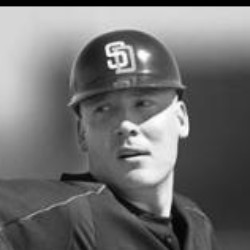

('empty face – ', '/Rob_Ramsay/Rob_Ramsay_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joe_Mendes/Joe_Mendes_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lori_Berenson/Lori_Berenson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elaine_Chao/Elaine_Chao_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Flynt/Larry_Flynt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emmanuelle_Beart/Emmanuelle_Beart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emmanuelle_Beart/Emmanuelle_Beart_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emmanuelle_Beart/Emmanuelle_Beart_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Blake/James_Blake_0009.jpg
/Us

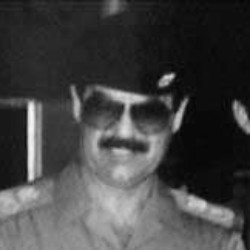

('empty face – ', '/Saddam_Hussein/Saddam_Hussein_0010.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Saddam_Hussein_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Saddam_Hussein/Sad

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chan_Gailey/Chan_Gailey_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chan_Gailey/Chan_Gailey_0001.jpg
list index out of range
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ontario_Lett/Ontario_Lett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Chinn/Kim_Chinn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carol_Burnett/Carol_Burnett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carol_Burnett/Carol_Burnett_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eli_Stutsman/Eli_Stutsman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mel_Gibson/Mel_Gibson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sy

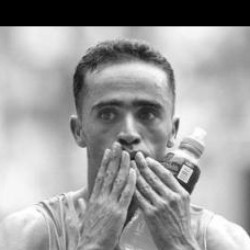

('empty face – ', '/Jaouad_Gharib/Jaouad_Gharib_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arthur_Johnson/Arthur_Johnson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashley_Judd/Ashley_Judd_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Peter_Hollingworth/Peter_Hollingworth_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susie_Castillo/Susie_Castillo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Susie_Castillo/Susie_Castillo_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marc_Anthony/Marc_Anthony_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Schweiker/Mark_Schweiker_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Schweiker/Mark_Sc

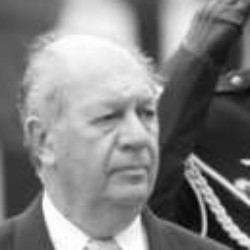

('empty face – ', '/Ricardo_Lagos/Ricardo_Lagos_0004.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricardo_Lagos/Ricardo_Lagos_0016.j

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Moose/Charles_Moose_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Moose/Charles_Moose_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Geragos/Mark_Geragos_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Geragos/Mark_Geragos_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cyndi_Thompson/Cyndi_Thompson_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cyndi_Thompson/Cyndi_Thompson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dario_Franchitti/Dario_Franchitti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Martin/Paul_Martin_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzani

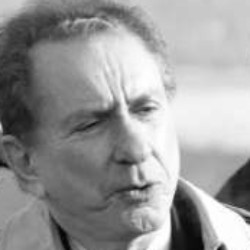

('empty face – ', '/Arlen_Specter/Arlen_Specter_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arlen_Specter/Arlen_Specter_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Narendra_Modi/Narendra_Modi_0001.jpg


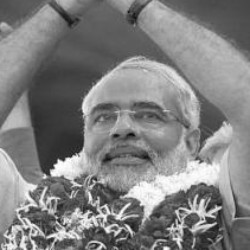

('empty face – ', '/Narendra_Modi/Narendra_Modi_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chang_Tso/Chang_Tso_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/William_Rosenberg/William_Rosenberg_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ray_Young/Ray_Young_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Phil_Cullen/Phil_Cullen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joshua_Gracin/Joshua_Gracin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Neri_Marcore/Neri_Marcore_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Neri_Marcore/Neri_Marcore_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stefaan_Declerk/Stefaan_Declerk_0001.jpg
/Users/ju

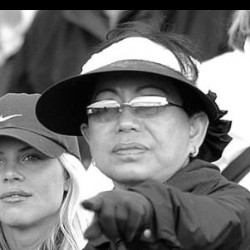

('empty face – ', '/Kultida_Woods/Kultida_Woods_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Keith_Van_Horn/Keith_Van_Horn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carlos_Alberto_Parreira/Carlos_Alberto_Parreira_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Simon/Bill_Simon_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Simon/Bill_Simon_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Simon/Bill_Simon_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Simon/Bill_Simon_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Simon/Bill_Simon_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Simon/Bill_Simon_0007.jpg
/Users/just

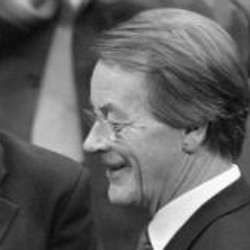

('empty face – ', '/Franz_Muentefering/Franz_Muentefering_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Franz_Muentefering/Franz_Muentefering_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Franz_Muentefering/Franz_Muentefering_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nadia_Petrova/Nadia_Petrova_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nadia_Petrova/Nadia_Petrova_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nadia_Petrova/Nadia_Petrova_0001.jpg


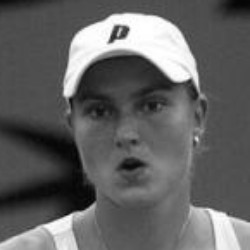

('empty face – ', '/Nadia_Petrova/Nadia_Petrova_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nadia_Petrova/Nadia_Petrova_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nadia_Petrova/Nadia_Petrova_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Wayne/John_Wayne_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gene_Orza/Gene_Orza_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Diana_Munz/Diana_Munz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Diana_Munz/Diana_Munz_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Diana_Munz/Diana_Munz_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ashton_Kutcher/Ashton_Kutcher_0002.jpg
/Users/justynaowczarek/Deve

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeremy_Greenstock/Jeremy_Greenstock_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeremy_Greenstock/Jeremy_Greenstock_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeremy_Greenstock/Jeremy_Greenstock_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeremy_Greenstock/Jeremy_Greenstock_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeremy_Greenstock/Jeremy_Greenstock_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeremy_Greenstock/Jeremy_Greenstock_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ed_Rendell/Ed_Rendell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steven_Hatfill/Steven_Hatfill_0002.jpg
/Users/justy

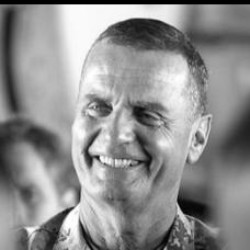

('empty face – ', '/James_Jones/James_Jones_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Claus/Prince_Claus_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Claus/Prince_Claus_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Claus/Prince_Claus_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Claus/Prince_Claus_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Brown/James_Brown_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Carlo_Fernandez/Jose_Carlo_Fernandez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brandon_Robinson/Brandon_Robinson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kathryn_Bigelow/Kathryn_Bigelo

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alastair_Campbell/Alastair_Campbell_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alastair_Campbell/Alastair_Campbell_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ricky_Ray/Ricky_Ray_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Coburn/James_Coburn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Kors/Michael_Kors_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Bettany/Paul_Bettany_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Janez_Drnovsek/Janez_Drnovsek_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jade_Jagger/Jade_Jagger_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

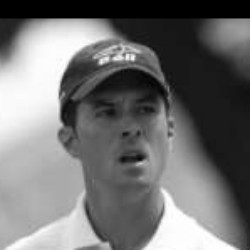

('empty face – ', '/Mike_Weir/Mike_Weir_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Weir/Mike_Weir_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i ob

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lance_Armstrong/Lance_Armstrong_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lance_Armstrong/Lance_Armstrong_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sheila_Fraser/Sheila_Fraser_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sheila_Fraser/Sheila_Fraser_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stan_Kasten/Stan_Kasten_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gary_Condit/Gary_Condit_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mufti_Mohammad_Syed/Mufti_Mohammad_Syed_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kristin_Davis/Kristin_Davis_0003.jpg
/Users/justynaowczarek/Development/studia/pr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Omar_Khan_Sharif/Omar_Khan_Sharif_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norbert_van_Heyst/Norbert_van_Heyst_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lynne_Thigpen/Lynne_Thigpen_0001.jpg


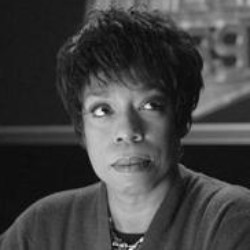

('empty face – ', '/Lynne_Thigpen/Lynne_Thigpen_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sammy_Knight/Sammy_Knight_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Greene/Larry_Greene_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Garth_Drabinsky/Garth_Drabinsky_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Chin-Hui_Tsao/Chin-Hui_Tsao_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Geoghan/John_Geoghan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Bhumibol_Adulyadej/King_Bhumibol_Adulyadej_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Frank_Keating/Frank_Keating_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Zaini_Abdullah/Z

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Adrian_McPherson/Adrian_McPherson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elena_Bovina/Elena_Bovina_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elena_Bovina/Elena_Bovina_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Elena_Bovina/Elena_Bovina_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicholoas_DiMarzio/Nicholoas_DiMarzio_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Helton/Mike_Helton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Helton/Mike_Helton_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicolas_Eyzaguirre/Nicolas_Eyzaguirre_0001.jpg
/Users/justynaowczarek/Development/studia/pr

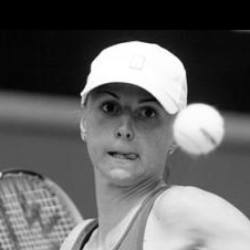

('empty face – ', '/Marlene_Weingartner/Marlene_Weingartner_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marlene_Weingartner/Marlene_Weingartner_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Donohue/David_Donohue_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Monica_Lewinsky/Monica_Lewinsky_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Monica_Lewinsky/Monica_Lewinsky_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Monica_Lewinsky/Monica_Lewinsky_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Henry/Boris_Henry_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marta_Dominguz/Marta_Dominguz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Victoria/Princess_Victoria_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Franklin/Thomas_Franklin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Weitzel/Robert_Weitzel_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Juan_Roman_Carrasco/Juan_Roman_Carrasco_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carolyn_Dawn_Johnson/Carolyn_Dawn_Johnson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carolyn_Dawn_Johnson/Carolyn_Dawn_Johnson_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carolyn_Dawn_Johnson/Carolyn_Dawn_Johnson_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Stephen_Ebberharter/Steph

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jonathan_Byrd/Jonathan_Byrd_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Heather_Whitestone_McCallum/Heather_Whitestone_McCallum_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Mauldin/Bill_Mauldin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ruben_Studdard/Ruben_Studdard_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ruben_Studdard/Ruben_Studdard_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Benjamin_Netanyahu/Benjamin_Netanyahu_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Benjamin_Netanyahu/Benjamin_Netanyahu_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Benjamin_Netanyahu/Benjamin_Netanyahu_0001.

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Bowa/Larry_Bowa_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Bowa/Larry_Bowa_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dave_Campo/Dave_Campo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dave_Campo/Dave_Campo_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dave_Campo/Dave_Campo_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lionel_Chalmers/Lionel_Chalmers_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rose_Linkins/Rose_Linkins_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Khum_Bahadur_Khadka/Khum_Bahadur_Khadka_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obraz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kim_Ryong-sung/Kim_Ryong-sung_0008.jpg
/Users/justynaowczarek/Development/studi

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitoji_Yabunaka/Mitoji_Yabunaka_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mitoji_Yabunaka/Mitoji_Yabunaka_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Robbins/Tim_Robbins_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Robbins/Tim_Robbins_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Robbins/Tim_Robbins_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Robbins/Tim_Robbins_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Robbins/Tim_Robbins_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jean-Marc_Olive/Jean-Marc_Olive_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aretha_Franklin/Aretha_Franklin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Maria_Garcia/Maria_Garcia_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Colace/Hugo_Colace_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Redford/Robert_Redford_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Redford/Robert_Redford_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Redford/Robert_Redford_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Redford/Robert_Redford_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Redford/Robert_Redford_0004.jpg
/Users/justynaowczarek/Development/studia/przetw

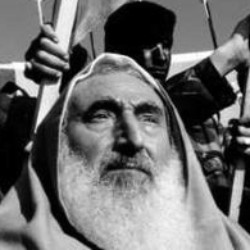

('empty face – ', '/Sheikh_Ahmed_Yassin/Sheikh_Ahmed_Yassin_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Szu_Yu_Chen/Szu_Yu_Chen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harvey_Weinstein/Harvey_Weinstein_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Harvey_Weinstein/Harvey_Weinstein_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Thomas_Stewart/Thomas_Stewart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Della_Clara/Della_Clara_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Matheny/Mike_Matheny_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Dirceu/Jose_Dirceu_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Dirceu/Jose_Dirce

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0029.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0039.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Chavez/Hugo_Chavez_0010.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hugo_Ch

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Luvera/Paul_Luvera_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lane_Bryant/Lane_Bryant_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Gannon/Paul_Gannon_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christine_Rau/Christine_Rau_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jane_Russell/Jane_Russell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Madge_Overhouse/Madge_Overhouse_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alyse_Beaupre/Alyse_Beaupre_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzani

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Blaney/George_Blaney_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Larry_Eustachy/Larry_Eustachy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Choi_Sung-hong/Choi_Sung-hong_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Choi_Sung-hong/Choi_Sung-hong_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Choi_Sung-hong/Choi_Sung-hong_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Choi_Sung-hong/Choi_Sung-hong_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Choi_Sung-hong/Choi_Sung-hong_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Tilly/Jennifer_Tilly_0001.jpg
/Users/justynaowczarek/Development/studia/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Harry/Prince_Harry_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_Harry/Prince_Harry_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/David_Sibleyk/David_Sibleyk_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Curry/Bill_Curry_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hisham_Halawi/Hisham_Halawi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Timothy_Wirth/Timothy_Wirth_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Laurie_Laychak/Laurie_Laychak_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matthew_Perry/Matthew_Perry_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów

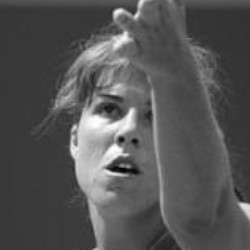

('empty face – ', '/Jennifer_Capriati/Jennifer_Capriati_0031.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0030.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0024.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0032.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0026.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Capriati/Jennifer_Capriati_0027.jpg
/Users/justynaowczarek/Development/studia/przetwarz

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Wolf/John_Wolf_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Surakait_Sathirathai/Surakait_Sathirathai_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Surakait_Sathirathai/Surakait_Sathirathai_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abid_Hamid_Mahmud_Al-Tikriti/Abid_Hamid_Mahmud_Al-Tikriti_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abid_Hamid_Mahmud_Al-Tikriti/Abid_Hamid_Mahmud_Al-Tikriti_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abid_Hamid_Mahmud_Al-Tikriti/Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Moon-So-ri/Moon-So-ri_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Frank_Cassell/Frank_Cassell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sasha_Cohen/Sasha_Cohen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Micky_Ward/Micky_Ward_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lara_Logan/Lara_Logan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Astrid_Eyzaguirre/Astrid_Eyzaguirre_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeffery_Strelzin/Jeffery_Strelzin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jaymon_Crabb/Jaymon_Crabb_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Arturo_Gatti/Arturo_Gatti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnał

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Farrell/Colin_Farrell_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Farrell/Colin_Farrell_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nastia_Liukin/Nastia_Liukin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Darrell_Porter/Darrell_Porter_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Darrell_Porter/Darrell_Porter_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Billy_Beane/Billy_Beane_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ronald_Brower/Ronald_Brower_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/keera_nightley/keera_nightley.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie syg

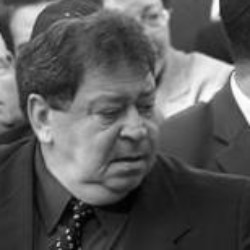

('empty face – ', '/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Daniele_Hypolito/Daniele_Hypolito_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Piuze/Michael_Piuze_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Matt_Herden/Matt_Herden_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Brent_Coles/Brent_Coles_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Linda_Ham/Linda_Ham_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pa

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Miller/Mike_Miller_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Miller/Mike_Miller_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Keller/Jennifer_Keller_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Keller/Jennifer_Keller_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Keller/Jennifer_Keller_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jennifer_Keller/Jennifer_Keller_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mia_Mottley/Mia_Mottley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicholas_Tse/Nicholas_Tse_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzani

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gary_Bettman/Gary_Bettman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Winterbottom/Michael_Winterbottom_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Winterbottom/Michael_Winterbottom_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Winterbottom/Michael_Winterbottom_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ralf_Schumacher/Ralf_Schumacher_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ralf_Schumacher/Ralf_Schumacher_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ralf_Schumacher/Ralf_Schumacher_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ralf_Schumacher/Ralf_Schumacher_0004.jpg


/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Gehman/Hal_Gehman_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Gehman/Hal_Gehman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Gehman/Hal_Gehman_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Gehman/Hal_Gehman_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdullah_Gul/Abdullah_Gul_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdullah_Gul/Abdullah_Gul_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdullah_Gul/Abdullah_Gul_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdullah_Gul/Abdullah_Gul_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdulla

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_J_Sheehan/Michael_J_Sheehan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Malcolm_Wild/Malcolm_Wild_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Thompson/Fred_Thompson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Thompson/Fred_Thompson_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Thompson/Fred_Thompson_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Clarke_Duncan/Michael_Clarke_Duncan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jerry_Seinfeld/Jerry_Seinfeld_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Karen_Clarkson/Karen_Clarkson_0001.jpg
/Users/justynaowczarek/Develop

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0031.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0024.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0030.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Junichiro_Koizumi/Junichiro_Koizumi_0

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norodom_Chakrapong/Norodom_Chakrapong_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bob_Bowlsby/Bob_Bowlsby_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alan_Dershowitz/Alan_Dershowitz_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donald_Anderson/Donald_Anderson_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Takenori_Kanzaki/Takenori_Kanzaki_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vanessa_Laine/Vanessa_Laine_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Anthony_Pisciotti/Anthony_Pisciotti_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abner_Martinez/Abner_Martinez_0001.jpg
/Users/justynaowczarek/Dev

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Edward_Said/Edward_Said_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nong_Duc_Manh/Nong_Duc_Manh_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kyoko_Nakayama/Kyoko_Nakayama_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christian_Patino/Christian_Patino_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alanna_Ubach/Alanna_Ubach_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pete_Rose/Pete_Rose_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pete_Rose/Pete_Rose_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Qazi_Afzal/Qazi_Afzal_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/i

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Pataki/George_Pataki_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Abdullah_II/King_Abdullah_II_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Abdullah_II/King_Abdullah_II_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Abdullah_II/King_Abdullah_II_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Abdullah_II/King_Abdullah_II_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/King_Abdullah_II/King_Abdullah_II_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Manley/John_Manley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Manley/John_Manley_0003.jpg
/Users/justynaowczarek/Development

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mike_Matthews/Mike_Matthews_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pier_Ferdinando_Casini/Pier_Ferdinando_Casini_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Wright/John_Wright_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Eckhard/Fred_Eckhard_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Eckhard/Fred_Eckhard_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Fred_Eckhard/Fred_Eckhard_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nathalia_Gillot/Nathalia_Gillot_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jeffrey_Scott_Postell/Jeffrey_Scott_Postell_0001.jpg
/Users/justynaowczarek/Devel

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Alejandro_Toledo/Alejandro_Toledo_0007.jpg
/Users/j

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Zahir_Shah/Zahir_Shah_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ian_Knop/Ian_Knop_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Clint_Lamebear/Clint_Lamebear_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bertrand_Bonello/Bertrand_Bonello_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bertrand_Bonello/Bertrand_Bonello_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Mishkin/Mark_Mishkin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gene_Autry/Gene_Autry_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dyana_Calub/Dyana_Calub_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0028.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0015.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0029.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Blix/Hans_Blix_0016.jpg
/Users/jus

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Henman/Tim_Henman_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Henman/Tim_Henman_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Henman/Tim_Henman_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Henman/Tim_Henman_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Henman/Tim_Henman_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Henman/Tim_Henman_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kirk_Douglas/Kirk_Douglas_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steven_Van_Zandt/Steven_Van_Zandt_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rupert_

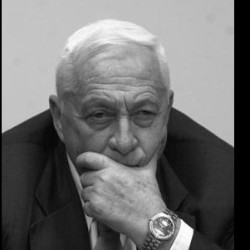

('empty face – ', '/Ariel_Sharon/Ariel_Sharon_0018.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0024.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0030.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0031.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0035.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ariel_Sharon/Ariel_Sharon_0009.jpg
/Users/justynao

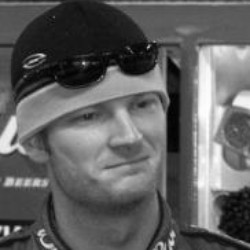

('empty face – ', '/Dale_Earnhardt_Jr/Dale_Earnhardt_Jr_0003.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dale_Earnhardt_Jr/Dale_Earnhardt_Jr_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dale_Earnhardt_Jr/Dale_Earnhardt_Jr_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Christian_Lirette/Christian_Lirette_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hector_Mitelman/Hector_Mitelman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Idi_Amin/Idi_Amin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tomas_Malik/Tomas_Malik_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesse_Ventura/Jesse_Ventura_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jesse_Ventura/Jesse_Ventura_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Vadim_Devyatovskiy/Vadim_Devyatovskiy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul-Henri_Mathieu/Paul-Henri_Mathieu_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul-Henri_Mathieu/Paul-Henri_Mathieu_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul-Henri_Mathieu/Paul-Henri_Mathieu_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lee_Hyung-taik/Lee_Hyung-taik_0001.jpg


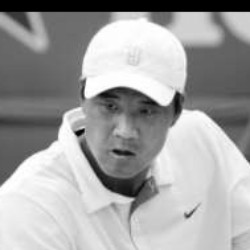

('empty face – ', '/Lee_Hyung-taik/Lee_Hyung-taik_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ray_Bradbury/Ray_Bradbury_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Corinne_Coman/Corinne_Coman_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Corinne_Coman/Corinne_Coman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Emyr_Jones_Parry/Emyr_Jones_Parry_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Diana/Princess_Diana_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Don_Carcieri/Don_Carcieri_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Benjamin_Franklin/Benjamin_Franklin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Asa_Hutchinson/Asa_H

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Robertson/George_Robertson_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Robertson/George_Robertson_0022.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Robertson/George_Robertson_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Robertson/George_Robertson_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leslie_Moonves/Leslie_Moonves_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leslie_Moonves/Leslie_Moonves_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kevin_Crane/Kevin_Crane_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gary_Bergeron/Gary_Bergeron_0001.jpg
/Users/justynaowczarek/Developme

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Baqir_al-Hakim/Mohammed_Baqir_al-Hakim_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Baqir_al-Hakim/Mohammed_Baqir_al-Hakim_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mohammed_Baqir_al-Hakim/Mohammed_Baqir_al-Hakim_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Polanski/Roman_Polanski_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Polanski/Roman_Polanski_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Polanski/Roman_Polanski_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Polanski/Roman_Polanski_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Polanski/Roman_Pola

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cruz_Bustamante/Cruz_Bustamante_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cruz_Bustamante/Cruz_Bustamante_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cruz_Bustamante/Cruz_Bustamante_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cruz_Bustamante/Cruz_Bustamante_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cruz_Bustamante/Cruz_Bustamante_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rod_Blagojevich/Rod_Blagojevich_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rod_Blagojevich/Rod_Blagojevich_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Claire_Danes/Claire_Danes_0001.jpg
/Users/justynaowczarek/Develop

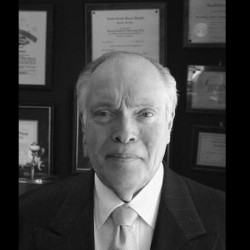

('empty face – ', '/Harvey_Wachsman/Harvey_Wachsman_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvie_Cabero/Silvie_Cabero_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0387.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0393.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0378.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0422.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0344.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0350.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_04

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0356.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0430.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0424.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0342.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0418.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0197.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0183.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0154.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0455.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0333.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0119.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0125.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0131.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0092.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0086.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0079.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0325.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0331.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0457.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0319.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0480.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0494.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0490.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0484.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

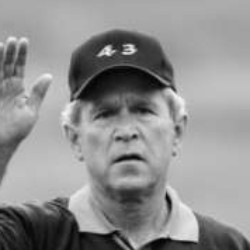

('empty face – ', '/George_W_Bush/George_W_Bush_0268.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0254.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0526.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0240.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0297.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0283.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0056.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0042.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0095.j

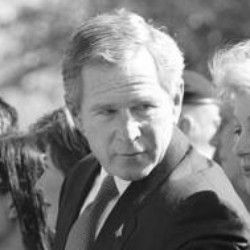

('empty face – ', '/George_W_Bush/George_W_Bush_0448.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0306.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0460.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0474.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0312.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0138.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0104.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0110.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0058.j

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0300.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0466.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0328.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0116.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0102.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0089.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0062.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0076.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0239.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0211.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0205.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0204.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0210.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0238.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0362.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0376.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0410.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0389.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0360.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0406.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0412.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_W_Bush/George_W_Bush_0374.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mario_Jardel/Mario_Jardel_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Richard_Ward/Richard_Ward_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Vermeil/Dick_Vermeil_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dick_Vermeil/Dick_Vermeil_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Mulder/Mark_Mulder_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Reinhard_Buetikofer/Reinhard_Buetikofer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Enrique_Medina_Gomez/Enrique_Medina_Gomez_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carla_Moreno/Carla_Moreno_0001.jpg
/Users/justynaowczarek/Development/studia/pr

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0020.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0024.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0030.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0031.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvio_Berlusconi/Silvio_Berlusconi_0

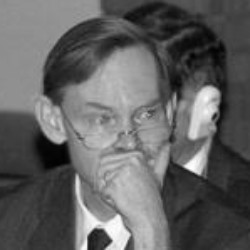

('empty face – ', '/Robert_Zoellick/Robert_Zoellick_0005.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Zoellick/Robert_Zoellick_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Zoellick/Robert_Zoellick_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Zoellick/Robert_Zoellick_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Zoellick/Robert_Zoellick_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Robert_Zoellick/Robert_Zoellick_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eddie_Jordan/Eddie_Jordan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norah_Jones/Norah_Jones_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Norah_Jones/Nora

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Naomi_Campbell/Naomi_Campbell_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Schnackenberg/Tom_Schnackenberg_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tocker_Pudwill/Tocker_Pudwill_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Amy_Smart/Amy_Smart_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Peter_Arnett/Peter_Arnett_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Peter_Arnett/Peter_Arnett_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Peter_Arnett/Peter_Arnett_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdul_Rahman/Abdul_Rahman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygn

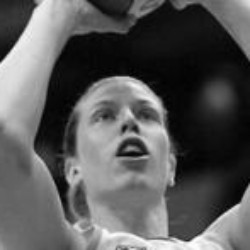

('empty face – ', '/Katie_Smith/Katie_Smith_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jerry_Hall/Jerry_Hall_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tim_Howard/Tim_Howard_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Daniel_Montenegro/Daniel_Montenegro_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Malcolm_Glazer/Malcolm_Glazer_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Melissa_Manchester/Melissa_Manchester_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Estelle_Morris/Estelle_Morris_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Solomon_Passy/Solomon_Passy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Faye_Alibocus/Faye_Alibocus_

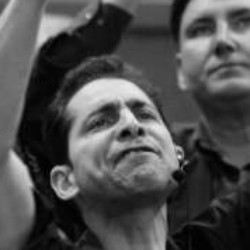

('empty face – ', '/Mark_Heller/Mark_Heller_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Heller/Mark_Heller_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Donnie_Brennan/Donnie_Brennan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Michele/Michael_Michele_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_Brodeur/Martin_Brodeur_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Martin_Brodeur/Martin_Brodeur_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kirk_Franklin/Kirk_Franklin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Atal_Bihari_Vajpay

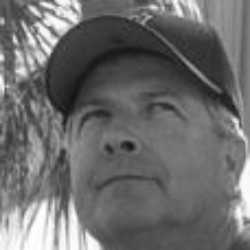

('empty face – ', '/Grady_Little/Grady_Little_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Philip_Elkann/John_Philip_Elkann_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shane_Mosley/Shane_Mosley_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shane_Mosley/Shane_Mosley_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cathryn_Crawford/Cathryn_Crawford_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bill_Pryor/Bill_Pryor_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Camilla_Parker_Bowles/Camilla_Parker_Bowles_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Camilla_Parker_Bowles/Camilla_Parker_Bowles_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/inpu

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Phil_Bredesen/Phil_Bredesen_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Coughlin/Natalie_Coughlin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Coughlin/Natalie_Coughlin_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Coughlin/Natalie_Coughlin_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Coughlin/Natalie_Coughlin_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Coughlin/Natalie_Coughlin_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Natalie_Coughlin/Natalie_Coughlin_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Marcus_Garrettson/Marcus_Garrettson_0001.jpg
/Users/justy

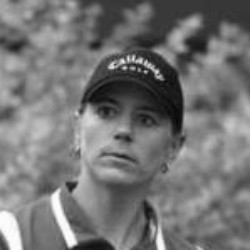

('empty face – ', '/Annika_Sorenstam/Annika_Sorenstam_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hans_Peter_Briegel/Hans_Peter_Briegel_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Owen_Nolan/Owen_Nolan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicanor_Duarte_Frutos/Nicanor_Duarte_Frutos_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicanor_Duarte_Frutos/Nicanor_Duarte_Frutos_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicanor_Duarte_Frutos/Nicanor_Duarte_Frutos_0011.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nicanor_Duarte_Frutos/Nicanor_Duarte_Frutos_0005.jpg
/Users/justynaowczarek/Development/st

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0018.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0019.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0031.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0025.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0035.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Serena_Williams/Serena_Williams_0034.jpg
/Users/justynaowczarek/D

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sally_Kirkland/Sally_Kirkland_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Caroline/Princess_Caroline_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Caroline/Princess_Caroline_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Caroline/Princess_Caroline_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Caroline/Princess_Caroline_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_Caroline/Princess_Caroline_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Al_Pacino/Al_Pacino_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Al_Pacino/Al_Pacino_0003.jpg
/Users/justynaowczarek/Develop

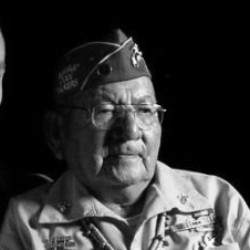

('empty face – ', '/Joe_Vandever/Joe_Vandever_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Leticia_Dolera/Leticia_Dolera_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Daniel_Osorno/Daniel_Osorno_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shireen_Amir_Begum/Shireen_Amir_Begum_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paige_Fitzgerald/Paige_Fitzgerald_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charles_Tannok/Charles_Tannok_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hama_Arba_Diallo/Hama_Arba_Diallo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gerard_de_Cortanze/Gerard_de_Cortanze_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/

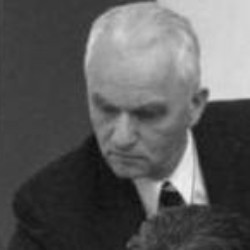

('empty face – ', '/Yasar_Yakis/Yasar_Yakis_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Yasar_Yakis/Yasar_Yakis_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barry_Williams/Barry_Williams_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Yeltsin/Boris_Yeltsin_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Boris_Yeltsin/Boris_Yeltsin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Helmut_Panke/Helmut_Panke_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nasser_al-Kidwa/Nasser_al-Kidwa_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Nasser_al-Kidwa/Nasser_al-Kidwa_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/George_Ryan/George_Ryan_0004.jpg
/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0021.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0009.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0008.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0020.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0022.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0023.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Hal_Sellers/Hal_Sellers_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/M

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Kerry/John_Kerry_0

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joan_Dangerfield/Joan_Dangerfield_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvan_Shalom/Silvan_Shalom_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvan_Shalom/Silvan_Shalom_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvan_Shalom/Silvan_Shalom_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvan_Shalom/Silvan_Shalom_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvan_Shalom/Silvan_Shalom_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Silvan_Shalom/Silvan_Shalom_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gregorio_Rosal/Gregorio_Rosal_0001.jpg
/Users/justynaowczarek/Development/studia/przetw

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Terunobu_Maeda/Terunobu_Maeda_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ron_Zook/Ron_Zook_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bruce_Willis/Bruce_Willis_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jason_Kapono/Jason_Kapono_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bertie_Ahern/Bertie_Ahern_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bertie_Ahern/Bertie_Ahern_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bertie_Ahern/Bertie_Ahern_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Bertie_Ahern/Bertie_Ahern_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/i

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eduard_Shevardnadze/Eduard_Shevardnadze_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eduard_Shevardnadze/Eduard_Shevardnadze_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eduard_Shevardnadze/Eduard_Shevardnadze_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eduard_Shevardnadze/Eduard_Shevardnadze_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Paul_Reiser/Paul_Reiser_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jose_Woldenberg/Jose_Woldenberg_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Zahn/Steve_Zahn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Carlos_Queiroz/Carlos_Queiroz_0001.jpg
/Users/justy

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roy_Moore/Roy_Moore_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roy_Moore/Roy_Moore_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roy_Moore/Roy_Moore_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roy_Moore/Roy_Moore_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Roman_Abramovich/Roman_Abramovich_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Compay_Segundo/Compay_Segundo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Maria_Wetterstrand/Maria_Wetterstrand_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pele/Pele_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lee_Ann

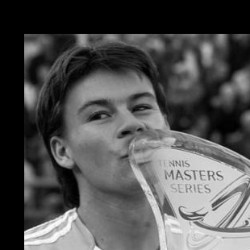

('empty face – ', '/Guillermo_Coria/Guillermo_Coria_0025.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0019.jpg


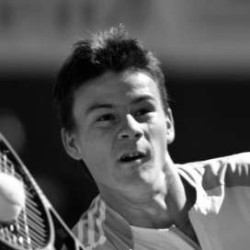

('empty face – ', '/Guillermo_Coria/Guillermo_Coria_0019.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0027.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0026.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Guillermo_Coria/Guillermo_Coria_0014.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Gu

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sebastien_Grosjean/Sebastien_Grosjean_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Sebastien_Grosjean/Sebastien_Grosjean_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Patricia_Medina/Patricia_Medina_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tali_Imani/Tali_Imani_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barry_Zito/Barry_Zito_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Barry_Zito/Barry_Zito_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Tom_Foy/Tom_Foy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rien_Long/Rien_Long_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obr

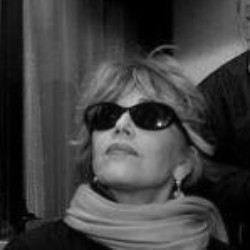

('empty face – ', '/Jane_Fonda/Jane_Fonda_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jane_Fonda/Jane_Fonda_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ethan_Hawke/Ethan_Hawke_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ethan_Hawke/Ethan_Hawke_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ethan_Hawke/Ethan_Hawke_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ethan_Hawke/Ethan_Hawke_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Montgomerie/Colin_Montgomerie_0005.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Montgomerie/Colin_Montgomerie_0004.jpg


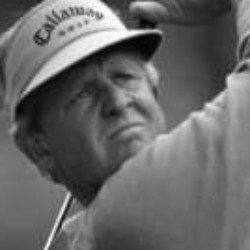

('empty face – ', '/Colin_Montgomerie/Colin_Montgomerie_0004.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Montgomerie/Colin_Montgomerie_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Montgomerie/Colin_Montgomerie_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Colin_Montgomerie/Colin_Montgomerie_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Kieran_Culkin/Kieran_Culkin_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Debra_Rose/Debra_Rose_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Aidan_Quinn/Aidan_Quinn_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Dita_Von_Tesse/Dita_Von_Tesse_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jim_Hendry

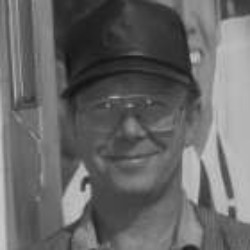

('empty face – ', '/Rob_Moore/Rob_Moore_0001.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Herman_Edwards/Herman_Edwards_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Cassandra_Heise/Cassandra_Heise_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Milan_Kucan/Milan_Kucan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Wendy_Kennedy/Wendy_Kennedy_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Koichiro_Matsuura/Koichiro_Matsuura_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Han_Sung_Joo/Han_Sung_Joo_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Eric_Benet/Eric_Benet_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Shirley_Jones/Shirley_Jones_0001.jpg
/Us

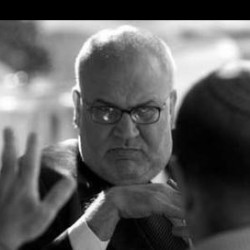

('empty face – ', '/Saeb_Erekat/Saeb_Erekat_0002.jpg')
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lou_Reed/Lou_Reed_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Richard_Reid/Richard_Reid_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Judi_Patton/Judi_Patton_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_William/Prince_William_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Prince_William/Prince_William_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/James_Baker/James_Baker_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Cusack/John_Cusack_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Cusack/John_Cusack_0002.jpg
/Users/justynaowczarek/De

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Rick_Lu/Rick_Lu_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Uzi_Landau/Uzi_Landau_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jack_Goodman/Jack_Goodman_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Charlie_Hunnam/Charlie_Hunnam_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Jen_Schefft/Jen_Schefft_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Newt_Gingrich/Newt_Gingrich_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Cuban/Mark_Cuban_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Mark_Cuban/Mark_Cuban_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Princess_

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Raaf_Schefter/Raaf_Schefter_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0041.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0040.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0036.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0022.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0023.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0037.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Lleyton_Hewitt/Lleyton_Hewitt_0009.jpg
/Users/justynaowczarek/Development/studia/

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0013.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0007.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0006.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0012.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0016.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/John_Ashcroft/John_Ashcroft_0017.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie 

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Xavier_Malisse/Xavier_Malisse_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Ludwig_Ovalle/Ludwig_Ovalle_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Caine/Michael_Caine_0003.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Caine/Michael_Caine_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Caine/Michael_Caine_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Caine/Michael_Caine_0004.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Agbani_Darego/Agbani_Darego_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Abdullatif_Sener/Abdullatif_Sener_0002.jpg
/Users/justynaowczarek/Development/studia/przetw

/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Sullivan/Michael_Sullivan_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Michael_Sullivan/Michael_Sullivan_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Joe_Friedberg/Joe_Friedberg_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Pio_Laghi/Pio_Laghi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Janusz_Kaminski/Janusz_Kaminski_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Desiree_Lemosi/Desiree_Lemosi_0001.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Desiree_Lemosi/Desiree_Lemosi_0002.jpg
/Users/justynaowczarek/Development/studia/przetwarzanie sygnałów i obrazów/input/Steve_Park/Steve_Park_0001.jpg
/Users/justynaowczarek/Development/studia/przetwar

In [690]:
people = pd.DataFrame()

for class_dir in os.listdir(inputDir):
    if not os.path.isdir(os.path.join(inputDir, class_dir)):
        continue
        
    if class_dir == 'temp':
        continue
        
    if class_dir == 'test':
        continue
        
    directory = cwd + '/input/temp/' + class_dir + '/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for img_path in image_files_in_folder(os.path.join(inputDir, class_dir)):
        print(img_path)
        try:
            encoding = process_image(img_path.replace(cwd + '/input', ''))
            encoding['person_name'] = class_dir
            people = people.append(encoding, ignore_index=True)
        except Exception as e:
            print(str(e))
        
        

In [762]:
people = pd.read_pickle('people_custom_encodings')

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
cols_to_norm = people.drop(columns='person_name').columns
people[cols_to_norm] = scaler.fit_transform(people[cols_to_norm])

people.drop(people[people.person_name=='images'].index, inplace=True) # moj wczesniejszy blad – niewyczyszczony folder
print("[INFO] saving people from processed input directories – size: ", people.shape[0])
file_name = "people_custom_encodings_normalized"
people.to_pickle(file_name)

people.head()

[INFO] saving people from processed input directories – size:  13124


amplituda_x  amplituda_y  lewe_oko_szerokosc  lewe_oko_wysokosc  \
0     0.454545     0.240000            0.447368           0.260870   
1     0.606061     0.333333            0.447368           0.217391   
2     0.583333     0.253333            0.421053           0.391304   
3     0.545455     0.373333            0.526316           0.391304   
4     0.545455     0.306667            0.473684           0.434783   

   prawe_oko_szerokosc  prawe_oko_wysokosc  odleglosc_miedzy_oczami  \
0             0.410256            0.428571                     0.50   
1             0.487179            0.190476                     0.58   
2             0.512821            0.428571                     0.54   
3             0.512821            0.428571                     0.51   
4             0.512821            0.428571                     0.51   

   lewa_brew_dlugosc  lewa_brew_szerokosc  prawa_brew_dlugosc  \
0           0.621053             0.282051            0.323232   
1           0.557895             0.333333            0.535354   
2           0.452632             0.410256            0.656566   
3           0.589474             0.692308            0.454545   
4           0.442105             0.256410            0.595960   

   prawa_brew_szerokosc  lewa_brew_odleglosc_punktow_wychylonych  \
0                 0.225                                 0.493151   
1                 0.275                                 0.493151   
2                 0.450                                 0.616438   
3                 0.600                                 0.849315   
4                 0.250                                 0.534247   

   prawa_brew_odleglosc_punktow_wychylonych  odleglosc_miedzy_brwiami  \
0                                  0.420290                  0.320755   
1                                  0.420290                  0.415094   
2                                  0.579710                  0.320755   
3                                  0.724638                  0.358491   
4                                  0.463768                  0.358491   

       person_name  
0      German_Khan  
1  Stefano_Gabbana  
2     Dragan_Covic  
3    Jeff_Hornacek  
4    Sureyya_Ayhan

In [787]:
import math 
  
known_people = pd.read_pickle(file_name)
print(known_people.shape[0])

y = known_people['person_name']
x = known_people.drop(columns='person_name')

model = KNeighborsClassifier(n_neighbors=math.floor(math.sqrt(known_people.shape[0])))
model.fit(x, y)

13124


KNeighborsClassifier(n_neighbors=114)

In [788]:
def normalize(encoding, scaler):
    normalized = scaler.transform(reshape_single_encoding(encoding))[0]
    dictionary = {k: normalized[list(encoding).index(k)] for k, v in encoding.items()}
    return dictionary

encoding_bloom = process_image('/test/orlando-bloom.jpg')
encoding_yvonne = process_image('/test/yvonne-strahovski.jpg')
encoding_vigo = process_image('/test/vigo-morgenstern.jpg')

print('bloom', model.predict(reshape_single_encoding(normalize(encoding_bloom, scaler))))
print('yvonne', model.predict(reshape_single_encoding(normalize(encoding_yvonne, scaler))))
print('vigo', model.predict(reshape_single_encoding(normalize(encoding_vigo, scaler))))

bloom ['Andre_Agassi']
yvonne ['Colin_Powell']
vigo ['Kalpana_Chawla']


/Users/justynaowczarek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/justynaowczarek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/justynaowczarek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/justynaowczarek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/justynaowczarek/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
 